# DMASS-GGL Results

### Unblinded by Sujeong Lee (Nov 12, 2020)

This work uses the 3x2pt data vectors using DMASS as lenses and Y1 metacal as sources.
Only the GGL measurement and relevant contours are blinded as Y1 metacal was already unblinded and the DMASS sample was defined to match its galaxy clustering with CMASS. The data vectors and contours are shifted randomly before plotting or numbers in the axes are hidden. 

In this notebook, we unblind DMASS GGL measurements and the constraint on galaxy-matter correlation coefficient $r_{cc}$. 
An accompanying work that uses the unblinded signals can be find in LINK. 

For unblinding, set `Blind_switch=None`

In [1]:
Blind_switch = None

In [2]:
blind_key='unblind'
if Blind_switch: blind_key='blind'    
print blind_key

unblind


In [3]:
import sys, os
sys.path.append('../measurement/code/')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import fitsio
from plot_modules import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [5]:
figdir = '../measurement/results/figure/'
#rootdir='../ggl_mcal_ran_x50_nside16_redo/'

In [6]:
# DMASS 3x2pt measurement
fitsname = '../measurement/results/fits/measurement_y1_dmass_3x2pt.fits'

# theory from fiducial cosmology
fitsname_theory='../measurement/results/bestfit_theory/simulated_y1_dmass_3x2pt_neff_baseline_cov.fits'

# best fit theory line, same number of bins
fits_bestfit = '../measurement/results/bestfit_theory/bestfit_rcc_y1_dmass_3x2pt.fits'

# best fit theory line, 50 bins (only for plotting)
fits_bestfit_50bins = '../measurement/results/bestfit_theory/bestfit_rcc_y1_dmass_3x2pt_50bins.fits'

# Redshift Distribution

In [7]:
# true redshift distribution (CMASS spec-z)

FITS_DMASS = fitsio.FITS(fitsname)

z_lens = FITS_DMASS['nz_lens']['Z_MID'].read()
nz_lens = FITS_DMASS['nz_lens']['BIN1'].read()

z_src = FITS_DMASS['nz_source']['Z_MID'].read()
nz_src_1 = FITS_DMASS['nz_source']['BIN1'].read()
nz_src_2 = FITS_DMASS['nz_source']['BIN2'].read()
nz_src_3 = FITS_DMASS['nz_source']['BIN3'].read()
nz_src_4 = FITS_DMASS['nz_source']['BIN4'].read()

In [8]:
# clustering-z (red error bars)

dmassfits_filename = '../measurement/results/fits/nz_dmass_clustering_z.fits'
dmassnz_fits = fitsio.FITS(dmassfits_filename)

zbin = dmassnz_fits['combined_weights_noRU']['z'].read()
N = dmassnz_fits['combined_weights_noRU']['N'].read()
Nerr = np.sqrt(dmassnz_fits['cov_combined_weights_noRU'].read().diagonal())

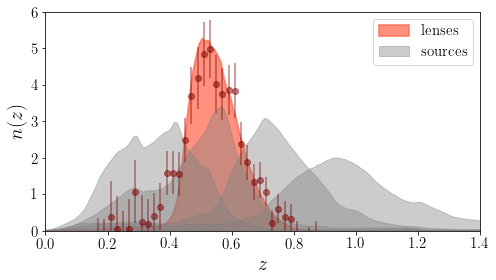

In [58]:
fig, ax = plt.subplots(figsize = (7,4))

ax.fill_between(z_lens, 0, nz_lens, facecolor = 'tomato',  lw = 1.8, edgecolor='tomato', alpha = 0.7, label='${\\rm lenses}$')
ax.fill_between(z_src, 0, nz_src_1, color = 'grey', alpha = 0.4, label='${\\rm sources}$')
ax.fill_between(z_src, 0, nz_src_2, color = 'grey', alpha = 0.4)
ax.fill_between(z_src, 0, nz_src_3, color = 'grey', alpha = 0.4)
ax.fill_between(z_src, 0, nz_src_4, color = 'grey', alpha = 0.4)

ax.errorbar(zbin, N, yerr = Nerr, fmt='o', capsize = 0, color='maroon', alpha = 0.5)

ax.set_xlim(0.0, 1.4)
ax.set_ylim(0.0, 6.0)
ax.set_ylabel('$n(z)$', fontsize=20)
ax.set_xlabel('$z$', fontsize=20)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)
fig.tight_layout()
fig.savefig(figdir+'/nz.pdf')

# Covariance Matrix Validation

In [62]:
theta = FITS_DMASS['galaxy_shear_xi']['ANG'].read()[:20]

# theretical cov from cosmoLike
cov_FITS_DMASS = FITS_DMASS['COVMAT'].read()[400:480, 400:480]
covth = [cov_FITS_DMASS[:20,:20], 
         cov_FITS_DMASS[20:40,20:40],
         cov_FITS_DMASS[40:60,40:60],
         cov_FITS_DMASS[60:,60:]]

In [71]:
# JK computation from Treecorr
outputdir = '../measurement/results/2pt/'
covjk1 = np.genfromtxt(outputdir+'/source1/finalize/covjk_gammat_boosted_srccorrec_Rmean.txt')
covjk2 = np.genfromtxt(outputdir+'/source2/finalize/covjk_gammat_boosted_srccorrec_Rmean.txt')
covjk3 = np.genfromtxt(outputdir+'/source3/finalize/covjk_gammat_boosted_srccorrec_Rmean.txt')
covjk4 = np.genfromtxt(outputdir+'/source4/finalize/covjk_gammat_boosted_srccorrec_Rmean.txt')
covjk = [covjk1, covjk2, covjk3, covjk4]

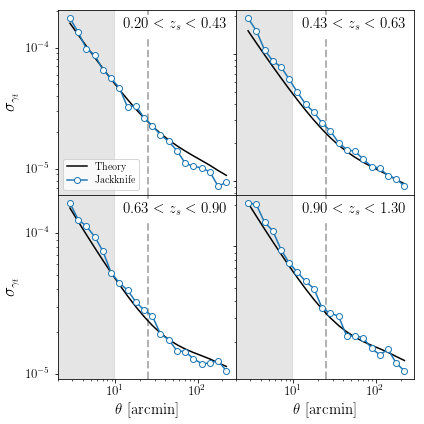

In [64]:
labels = [ '$0.20 < z_s < 0.43$' ,  '$0.43 < z_s < 0.63$' ,  '$0.63 < z_s < 0.90$' ,  '$0.90 < z_s < 1.30$'  ]


fig, ax = plt.subplots(2,2, figsize=(6,6))
ax= ax.ravel()
for i in range(4):
    ax[i].axvspan(1, 9.5, alpha=0.2, color='grey')
    ax[i].axvline(x=25, alpha=0.3, ls='--', color='black', lw=2)
    ax[i].loglog( theta, np.sqrt(covth[i].diagonal()), 'k-', label=r'{Theory}')
    ax[i].loglog( theta, np.sqrt(covjk[i].diagonal()), 'o-', markerfacecolor='w', label=r'{Jackknife}')
    ax[i].set_xlabel('$\\theta$ ${\\rm [arcmin]}$', fontsize=15)
    ax[i].text(0.95, 0.95, labels[i], transform=ax[i].transAxes, 
               fontsize=15, horizontalalignment='right', verticalalignment='top', backgroundcolor='w')
    ax[i].tick_params( labelsize=13 )    
    ax[i].set_xlim(2,)
    
ax[0].legend(loc=3)
ax[0].set_ylabel('${\sigma_{\gamma_t}}$', fontsize=17)
ax[2].set_ylabel('${\sigma_{\gamma_t}}$', fontsize=17)

ax[1].set_yticklabels([])
ax[3].set_yticklabels([])


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)

fig.savefig(figdir+'/cov_validation.pdf')

# Observing Condition

In [70]:
outputdir_sys='../measurement/results/observing_condition/'
nside=16

In [66]:
import pickle
f = open(outputdir_sys+'/sig_crit_inv_eff_z02_13_dmass.pkl')
sig_crit_dics = pickle.load(f)
f2 = open(outputdir_sys+'/R_amp_ratio_cut4.pkl')
R_amp_source_values_cut4 = pickle.load(f2)
f3 = open(outputdir_sys+'/R_amp_ratio_cut12.pkl')
R_amp_source_values = pickle.load(f3)

In [67]:
labels_ = ['airmass', 'skybrite', 'maglim', 'fwhm']
cutvalue = [1.26, 285, 23.92, 3.68]
suffix_ = ['low', 'hi']
labels=[ l1+'_'+l2 for l1 in labels_ for l2 in suffix_ ]

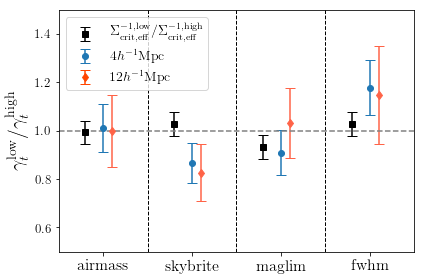

In [68]:
sigma_z = 0.035 * np.sqrt(2)

nn = 1
fig, ax = plt.subplots()
#for la in labels:

labels_latex = []
for la in labels_:
    sig_crit_dics['ratio_'+la] = sig_crit_dics[la+'_low']/sig_crit_dics[la+'_hi']
    
    ax.errorbar(nn-0.2, sig_crit_dics['ratio_'+la], yerr=sigma_z, fmt='s', color='k', capsize=5)
    ax.errorbar(nn, R_amp_source_values_cut4['ratio_'+la], 
                yerr=R_amp_source_values_cut4['err_ratio_'+la], fmt='o', color='tab:blue', capsize=5)
    ax.errorbar(nn+0.1, R_amp_source_values['ratio_'+la], 
                yerr=R_amp_source_values['err_ratio_'+la], fmt='d', color = 'tomato', capsize=5)
    
    nn += 1
    labels_latex.append( '${\\rm '+ la + '}$' )

ax.errorbar(nn-0.2, sig_crit_dics['ratio_'+la], yerr=sigma_z, fmt='s', color='k', capsize=5,\
           label='$\Sigma^{-1, {\\rm low} }_{\\rm crit, eff} / \Sigma^{-1, {\\rm high} }_{\\rm crit, eff}$')
ax.errorbar(nn, R_amp_source_values_cut4['ratio_'+la], yerr=R_amp_source_values_cut4['err_ratio_'+la], 
            fmt='o', color='tab:blue', capsize=5, label='$4 h^{-1} {\\rm Mpc}$')
ax.errorbar(nn+0.1, R_amp_source_values['ratio_'+la], yerr=R_amp_source_values['err_ratio_'+la], fmt='d', 
            color='orangered', capsize=5, label='$12 h^{-1} {\\rm Mpc}$')
   
ax.tick_params(labelsize=13)
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylabel( '$\gamma_t^{\\rm low} / \gamma_t^{\\rm high}$',fontsize=20 )
ax.set_xticklabels(['']+labels_latex+[''], fontsize=16)
ax.set_xlim(0.5, 4.5)
ax.set_ylim(0.5, 1.5)
ax.axvline(x=1.5, ls='--', color='k', lw=1)
ax.axvline(x=2.5, ls='--', color='k', lw=1)
ax.axvline(x=3.5, ls='--', color='k', lw=1)
ax.legend(fontsize = 14)
ax.axhline(y=1.0, ls='--', color='grey')
fig.tight_layout()
#fig.savefig(rootdir_sys + '/fig/sys_ratio.pdf')
fig.savefig(figdir + '/sys_ratio.pdf')

# Galaxy-galaxy lensing

### GGL $\gamma_t$

/home/lee.5922/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


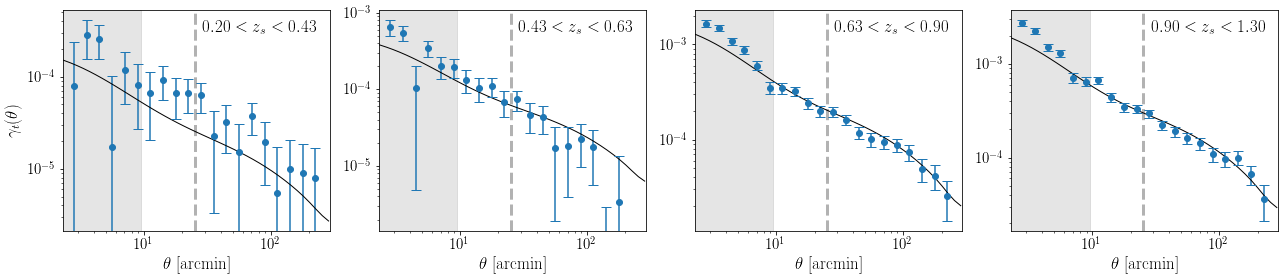

In [10]:
figname = figdir+'gammat.pdf'.format(blind_key)
plotting_measurement_from_fits( fitsname=fitsname, theory=fits_bestfit_50bins, blind=Blind_switch, 
                            scalecut=True, thetagamma=False, 
                            yextent = None, data_labels = None, angcut=9.5, 
                            ylabel='$\gamma_t (\\theta)$', figname=figname)

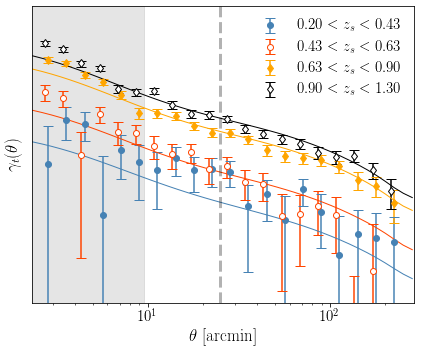

In [11]:
figname = figdir+'gammat_onepanel.pdf'.format(blind_key)
plotting_measurement_from_fits_in_onepanel( fitsname=fitsname, theory=fits_bestfit_50bins, 
                            scalecut=True, thetagamma=False, 
                            yextent = None, data_labels = None, angcut=9.5, 
                            ylabel='$\gamma_t (\\theta)$', figname=figname)

### Cross component

In [15]:
no_mask_ang = [1,1,1,1]
mask_ang4 = [9.5,9.5,9.5,9.5]
mask_ang12 = [27,27,27,27]

chi2=7.01/14
chi2=4.53/10
chi2=10.35/14
chi2=6.61/10
chi2=16.09/14
chi2=13.13/10
chi2=15.27/14
chi2=9.45/10
4 Mpc/h: chi2=48.72/56
12Mpc/h: chi2=33.72/40
fig saved to  ../measurement/results/figure/gammax.pdf


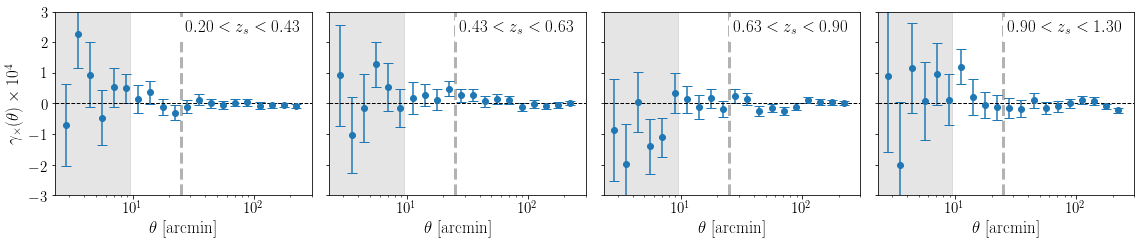

In [17]:
figname = figdir+'gammax.pdf'
outputdir = '../measurement/results/2pt/'
plotting_measurement_split( outputdir, blind=False,
                           types=['gammax_srccorrec_Rmean'], 
                           ylabel='$\gamma_{\\times} (\\theta) \\times 10^4$', yscale='linear', 
                           yaxhline=0, thetagamma=False, yextent=[-3, 3], prefactor=1e+04, mask_ang=mask_ang4,
                           data_labels=['$\gamma_{\\times} (\\theta)$'], figname=figname )

### Boost Factor

chi2=2758175.49/14
chi2=2602073.24/10
chi2=2870594.93/14
chi2=2721414.97/10
chi2=2862455.08/14
chi2=2816146.20/10
chi2=2667840.56/14
chi2=2560952.88/10
4 Mpc/h: chi2=11159066.06/56
12Mpc/h: chi2=10700587.29/40
fig saved to  ../measurement/results/figure/boostfactor.pdf


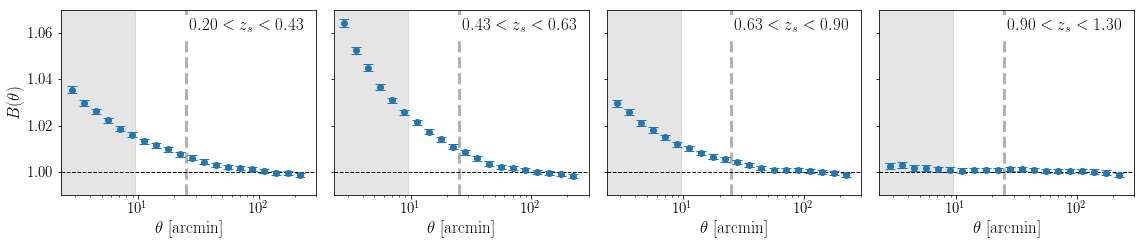

In [18]:
figname = figdir+'boostfactor.pdf'
outputdir = '../measurement/results/2pt/'
plotting_measurement_split( outputdir, blind=False,
                           types=['boostfactor_srccorrec'], 
                           ylabel='$B(\\theta)$', 
                           yscale='linear', mask_ang=mask_ang4,
                           yaxhline=1, yextent = [0.99, 1.07], figname=figname)

In [53]:

#fits_bestfit_50bins = '/n/des/lee.5922/programs/cosmolike/DMASS-analysis/simulated_data/simulated_y1_dmass_3x2pt_rcc_bestfit_50bins.fits'
#fits_theroy = '../../simulated_data_p2018/simulated_y1_dmass_3x2pt_neff_baseline.fits'

In [29]:
import fitsio

# data
fits = fitsio.FITS(fitsname)
data = fits['galaxy_xi']['VALUE'].read()
ang = fits['galaxy_xi']['ANG'].read()
bin_no = fits['galaxy_xi']['BIN2'].read()
cov = fits['COVMAT'].read()[-20:, -20:]
err = np.sqrt(cov.diagonal())

#best fit theory line, same number of bins
fits_theory = fitsio.FITS(fits_bestfit)
theory = fits_theory['galaxy_xi']['VALUE'].read()
ang_theory = fits_theory['galaxy_xi']['ANG'].read()
bin_no_theory = fits_theory['galaxy_xi']['BIN2'].read()
cov_theory = fits['COVMAT'].read()[-20:, -20:]
err_theory = np.sqrt(cov_theory.diagonal()) * np.sqrt(1200./9000)

In [30]:
# best fit theory line, 50 bins (only for plotting)
fits_theory = fitsio.FITS(fits_bestfit_50bins)
theory2 = fits_theory['galaxy_xi']['VALUE'].read()
#theory_masked = theory[mask]
ang_theory2 = fits_theory['galaxy_xi']['ANG'].read()
bin_no_theory2 = fits_theory['galaxy_xi']['BIN2'].read()

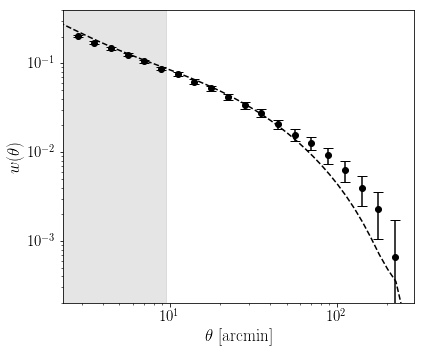

In [21]:
figname=figdir+'/wtheta.pdf'
xlabel = '$\\theta$ ${\\rm [arcmin]}$'
ylabel='$w (\\theta)$'

fig, ax = plt.subplots(figsize=(6,5) )
ax.plot(ang_theory2, theory2, ls='--', color='black')
ax.errorbar(ang, data, yerr=err, fmt='o', markerfacecolor=None,  color='black', capsize=5)
ax.set_xscale('log')
ax.set_yscale('log', fontsize=17)
ax.set_xlabel(xlabel,fontsize=17)
ax.set_xlim(2.3, 290)
ax.set_ylim(2e-04, 0.4)
ax.tick_params(labelsize=15)
ax.axvspan(1, 9.5, alpha=0.2, color='grey')
ax.legend(loc=1, fontsize=15, frameon=False)
ax.set_ylabel(ylabel,fontsize=17)
plt.tight_layout()
fig.savefig(figname)

### SNR and $\chi^2$

In [22]:
from plot_modules import calculate_gammat_SNR, calculate_chi2_diff

In [ ]:
# gammat

In [23]:
print '\nno scale cut \n---------------------------------'
calculate_gammat_SNR( fitsname=fitsname, angcut=0, blind=Blind_switch )
print '\n4Mpc/h \n---------------------------------'
calculate_gammat_SNR( fitsname=fitsname, angcut=9, blind=Blind_switch )
print '\n12Mpc/h \n---------------------------------'
calculate_gammat_SNR( fitsname=fitsname, angcut=27, blind=Blind_switch )


no scale cut 
---------------------------------
total:   SNR=42.88, dof=80
source1: SNR=6.35, dof=20
source2: SNR=10.59, dof=20
source3: SNR=28.52, dof=20
source4: SNR=31.89, dof=20

4Mpc/h 
---------------------------------
total:   SNR=25.69, dof=56
source1: SNR=5.17, dof=14
source2: SNR=6.83, dof=14
source3: SNR=17.20, dof=14
source4: SNR=20.05, dof=14

12Mpc/h 
---------------------------------
total:   SNR=17.73, dof=40
source1: SNR=4.07, dof=10
source2: SNR=5.00, dof=10
source3: SNR=12.39, dof=10
source4: SNR=13.82, dof=10


In [31]:
print '\nno scale cut \n---------------------------------'
calculate_chi2_diff( fitsname=fitsname, theory=fits_bestfit, angcut=0, blind=Blind_switch )
print '\n4Mpc/h \n---------------------------------'
calculate_chi2_diff( fitsname=fitsname, theory=fits_bestfit, angcut=9, blind=Blind_switch )
print '\n12Mpc/h \n---------------------------------'
calculate_chi2_diff( fitsname=fitsname, theory=fits_bestfit, angcut=27, blind=Blind_switch )


no scale cut 
---------------------------------
total:   chi2=178.15/80
source1: chi2=16.87/20
source2: chi2=29.27/20
source3: chi2=53.11/20
source4: chi2=77.72/20

4Mpc/h 
---------------------------------
total:   chi2=49.62/56
source1: chi2=11.47/14
source2: chi2=14.44/14
source3: chi2=6.71/14
source4: chi2=14.53/14

12Mpc/h 
---------------------------------
total:   chi2=36.23/40
source1: chi2=8.38/10
source2: chi2=13.07/10
source3: chi2=5.18/10
source4: chi2=7.08/10


In [ ]:
#wtheta

In [32]:
calculate_chi2_diff( fitsname=fitsname, theory=fits_bestfit, section='galaxy_xi', angcut=9, blind=Blind_switch )

total:   chi2=14.31/14
source1: chi2=14.31/14
source2: chi2=0.00/0
source3: chi2=0.00/0
source4: chi2=0.00/0


# LCDM galaxy bias 

## GGL only

Loading Chains

In [34]:
chaindir = '../measurement/results/chains/'

# BOSS
chainfile_name = chaindir+'ext_boss_rcc_cut12_chain.txt'
cosmosis_chain_boss_fixed = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, blind=Blind_switch)

# ggl only, sys
chainfile_name = chaindir+'des_ggl_photoz_ia_neff_cut12_run1_chain.txt'
cosmosis_chain_dggl_photoz_ia_c12 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, blind=Blind_switch) 

chainfile_name = chaindir+'des_ggl_photoz_ia_neff_cut4_run1_chain.txt'
cosmosis_chain_dggl_photoz_ia_c4 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, blind=Blind_switch) 


# JOINT, sys
chainfile_name = chaindir+'des_ggl_ext_boss_photoz_ia_neff_cut12_run1_chain.txt'
cosmosis_chain_dgglb_photoz_ia_c12 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

chainfile_name = chaindir+'des_ggl_ext_boss_photoz_ia_neff_cut4_run1_chain.txt'
cosmosis_chain_dgglb_photoz_ia_c4 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

# JOINT, sys, no lower bins
chainfile_name = chaindir+'des_ggl_ext_boss_photoz_ia_neff_srcbin_34_cut12_run2_chain.txt'
cosmosis_chain_dgglb_photoz_ia_src34_c12 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

chainfile_name = chaindir+'des_ggl_ext_boss_photoz_ia_neff_srcbin_34_cut4_run2_chain.txt'
cosmosis_chain_dgglb_photoz_ia_src34_c4 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 



## change params names
boss_bin_bias = cosmosis_chain_boss_fixed['bin_bias--b1']
cosmosis_chain_boss_fixed['boss--b1'] = boss_bin_bias

boss_bin_bias = cosmosis_chain_dggl_photoz_ia_c12['bin_bias--b1']
cosmosis_chain_dggl_photoz_ia_c12['boss--b1'] = boss_bin_bias

boss_bin_bias = cosmosis_chain_dggl_photoz_ia_c4['bin_bias--b1']
cosmosis_chain_dggl_photoz_ia_c4['boss--b1'] = boss_bin_bias

0
0
0
0
0
0
0


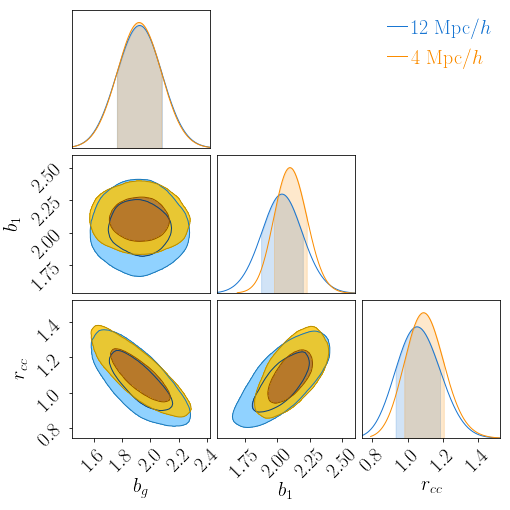

In [35]:
params2plot_full = [
     'boss--b1',
     'bin_bias--b1',
     'boss--rcc',   
]

figname = figdir+'contour_rcc_3par.pdf'
plotting_contours([
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dgglb_photoz_ia_c4,
            ],
    params2plot_full, figname=figname, 
    chain_names=[ r'$12~{\rm Mpc}/h$',r'$4~{\rm Mpc}/h$'],
    colors = ['blue', 'orange'],
    linestyles=['-', '-', '-', '--'],
    shade_alpha=[0.5, 0.8],
    plot_hists=True, 
    blind= Blind_switch, 
    figsize=(7,7),
    kde = [2,2,2,2] )

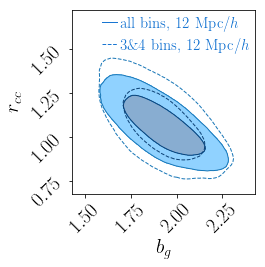

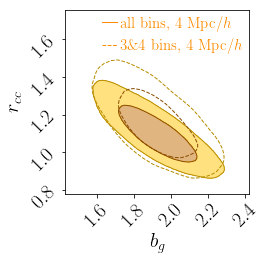

In [36]:
params2plot_2par = [
     'boss--b1',
     'boss--rcc',   
]

figname = figdir+'contour_rcc_src34_cut12.pdf'
plotting_contours([
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dgglb_photoz_ia_src34_c12,
            ],
    params2plot_2par, figname=figname, 
    chain_names=[ r'all bins, $12~{\rm Mpc}/h$',r'3$\&$4 bins, $12~{\rm Mpc}/h$', \
                # r'all bins, $4~{\rm Mpc}/h$', r'3$\&$4 bins, $4~{\rm Mpc}/h$'
                ],
    colors = ['blue', 'blue'],
    linestyles=['-', '--', '-', '--'],
    linewidths = [1,1,1,2],
    shade_alpha=[0.5, 0.0],
    plot_hists=False, 
    blind= Blind_switch, 
    figsize=(3,3),
    legend_kwargs = {'loc':'best', 'fontsize':15},
    kde = [2,2,2,2] )


figname = figdir+'contour_rcc_src34_cut4.pdf'.format(blind_key)
plotting_contours([
             cosmosis_chain_dgglb_photoz_ia_c4,
             cosmosis_chain_dgglb_photoz_ia_src34_c4
            ],
    params2plot_2par, figname=figname, 
    chain_names=[ r'all bins, $4~{\rm Mpc}/h$', r'3$\&$4 bins, $4~{\rm Mpc}/h$'],
    colors = ['orange', 'orange', 'orange', 'orange'],
    linestyles=['-', '--', '-', '--'],
    linewidths = [1,1,1,2],
    shade_alpha=[0.5, 0.0],
    plot_hists=False, 
    blind= Blind_switch, 
    figsize=(3,3),
    legend_kwargs = {'loc':'best', 'fontsize':15},
    kde = [2,2,2,2] )

In [37]:
table = calculate_summary_statistics([
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dgglb_photoz_ia_c4,
             cosmosis_chain_dgglb_photoz_ia_src34_c12,
             cosmosis_chain_dgglb_photoz_ia_src34_c4
            ], \
            params2plot_full,  blind=Blind_switch,        
            chain_names=[r'$12~{\rm Mpc}/h$',r'$4~{\rm Mpc}/h$',\
                         r'3&4, $12~{\rm Mpc}/h$',r'3&4, $4~{\rm Mpc}/h$ (sys)'],\
            kde=[2,2,2,2,2],
            )

$12~{\rm Mpc}/h$ :
  --  $b_g$ : 1.92^{+0.16}_{-0.16}
  --  $b_1$ : 2.04^{+0.16}_{-0.16}
  --  $r_{cc}$ : 1.06^{+0.13}_{-0.12}
$4~{\rm Mpc}/h$ :
  --  $b_g$ : 1.92^{+0.16}_{-0.15}
  --  $b_1$ : 2.10^{+0.13}_{-0.12}
  --  $r_{cc}$ : 1.09^{+0.12}_{-0.11}
3&4, $12~{\rm Mpc}/h$ :
  --  $b_g$ : 1.92^{+0.17}_{-0.16}
  --  $b_1$ : 2.05^{+0.23}_{-0.23}
  --  $r_{cc}$ : 1.06^{+0.16}_{-0.15}
3&4, $4~{\rm Mpc}/h$ (sys) :
  --  $b_g$ : 1.91^{+0.16}_{-0.15}
  --  $b_1$ : 2.20^{+0.20}_{-0.20}
  --  $r_{cc}$ : 1.15^{+0.14}_{-0.14}


### Add Clustering

In [38]:
# JOINT, sys + add galaxy clustering

chainfile_name = chaindir+'des_w_ggl_ext_boss_photoz_ia_neff_cut4_run1_chain.txt'
cosmosis_chain_dwgglb_photoz_ia_c4 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

chainfile_name = chaindir+'des_w_ggl_photoz_ia_neff_cut4_run1_chain.txt'
cosmosis_chain_dwggl_photoz_ia_c4 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

chainfile_name = chaindir+'des_w_ggl_photoz_ia_neff_cut12_run1_chain.txt'
cosmosis_chain_dwggl_photoz_ia_c12 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 

chainfile_name = chaindir+'des_w_ggl_ext_boss_photoz_ia_neff_cut12_run1_chain.txt'
cosmosis_chain_dwgglb_photoz_ia_c12 = loading_cosmosis_chain(chainfile_name=chainfile_name, S8=False, joint=True, blind=Blind_switch) 


0
0
0
0


In [39]:
def plotting_errorbars_rcc(chains, params2plot, truth=None, figname='test.png',
    extra_parameter_spacing=1.3, vertical_spacing_ratio = 1.5, blind=None, colors = None, 
    chain_names=None, figsize=1.5, kde=None ):
    """
    keep : list. choose in the second chain
    params_fid : fiducial value of chain2
    """
    c = ChainConsumer()
    if chain_names is None : chain_names = ['chain'+str(i+1) for i in range(len(chains)) ]
        
    if colors is None : colors = ['black']
    if kde is None:  kde = []
    for name_i, data in enumerate(chains) :
        c.add_chain(on_params(data, params2plot), weights=data['weight'] if 'weight' in data.keys() else None,
            parameters=['$'+l+'$' for l in get_label(params2plot)], name=chain_names[name_i])
        if colors is None : colors.append('black')
        if kde is None: kde.append(1)
         
    c.configure(label_font_size=15, tick_font_size =30,
                colors=colors, kde = kde)

    #c.configure_truth(ls=":", color="#FB8C00")
    c.configure_truth(ls=":", color="grey")
    c.plotter.plot_summary(filename = figname, errorbar=True, blind=blind,
                       truth=truth, include_truth_chain=False,figsize=figsize, 
                       extra_parameter_spacing=extra_parameter_spacing, 
                          vertical_spacing_ratio = vertical_spacing_ratio)
    print "plot save to ", figname
    return c

plot save to  ../measurement/results/figure/errorbar_clustering.pdf


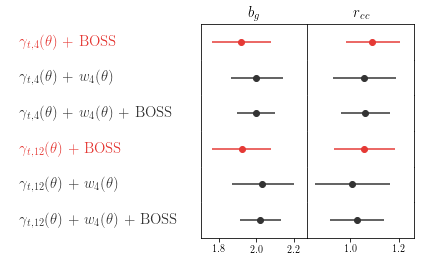

In [40]:
figname = figdir+'errorbar_clustering.pdf'
plotting_errorbars_rcc([
             #cosmosis_chain_gglb_sim_c4,
             cosmosis_chain_dgglb_photoz_ia_c4,
             cosmosis_chain_dwggl_photoz_ia_c4,
             cosmosis_chain_dwgglb_photoz_ia_c4,
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dwggl_photoz_ia_c12,
             cosmosis_chain_dwgglb_photoz_ia_c12,
            ],
    params2plot_2par, 
    figname=figname, 
    chain_names=[r'$\gamma_{t,4} (\theta)$ + BOSS', 
                 r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$',
                 r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ + BOSS',
                 r'$\gamma_{t,12} (\theta)$ + BOSS', 
                 r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$',
                 r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ + BOSS',],
    kde = [2,2,2,2,2,2],
    blind= Blind_switch, 
    vertical_spacing_ratio = 1.5,
    figsize=1.1,
    extra_parameter_spacing=1.0, 
    colors = ['red', 'black', 'black','red','black','black'])


In [41]:
table = calculate_summary_statistics([
             cosmosis_chain_dgglb_photoz_ia_c4,
             cosmosis_chain_dwggl_photoz_ia_c4,
             cosmosis_chain_dwgglb_photoz_ia_c4,
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dwggl_photoz_ia_c12,
             cosmosis_chain_dwgglb_photoz_ia_c12
            ], \
            params2plot_2par, 
            blind=Blind_switch, 
            kde = [2,2,2,2,2,2],
            chain_names=[r'$\gamma_{t,4} (\theta)$ + BOSS', 
                         r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$',
                         r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ + BOSS',
                         r'$\gamma_{t,12} (\theta)$ + BOSS', 
                         r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$',
                         r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ + BOSS']
            )

$\gamma_{t,4} (\theta)$ + BOSS :
  --  $b_g$ : 1.92^{+0.16}_{-0.15}
  --  $r_{cc}$ : 1.09^{+0.12}_{-0.11}
$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ :
  --  $b_g$ : 2.00^{+0.14}_{-0.14}
  --  $r_{cc}$ : 1.06^{+0.13}_{-0.13}
$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ + BOSS :
  --  $b_g$ : 2.00^{+0.10}_{-0.10}
  --  $r_{cc}$ : 1.06^{+0.10}_{-0.10}
$\gamma_{t,12} (\theta)$ + BOSS :
  --  $b_g$ : 1.92^{+0.16}_{-0.16}
  --  $r_{cc}$ : 1.06^{+0.13}_{-0.12}
$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ :
  --  $b_g$ : 2.03^{+0.17}_{-0.16}
  --  $r_{cc}$ : 1.01^{+0.16}_{-0.15}
$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ + BOSS :
  --  $b_g$ : 2.02^{+0.11}_{-0.11}
  --  $r_{cc}$ : 1.03^{+0.11}_{-0.11}


In [42]:
params2plot_3par = [
     'boss--b1',
     'boss--rcc',   
     'bin_bias--b1'
]

table = calculate_summary_statistics([
             cosmosis_chain_dgglb_photoz_ia_c4,
             cosmosis_chain_dwggl_photoz_ia_c4,
             cosmosis_chain_dwgglb_photoz_ia_c4,
             cosmosis_chain_dgglb_photoz_ia_c12,
             cosmosis_chain_dwggl_photoz_ia_c12,
             cosmosis_chain_dwgglb_photoz_ia_c12
            ], \
            params2plot_3par, 
            blind=Blind_switch, 
            kde = [2,2,2,2,2,2],
            chain_names=[r'$\gamma_{t,4} (\theta)$ + BOSS', 
                         r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$',
                         r'$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ + BOSS',
                         r'$\gamma_{t,12} (\theta)$ + BOSS', 
                         r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$',
                         r'$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ + BOSS']
            )

$\gamma_{t,4} (\theta)$ + BOSS :
  --  $b_g$ : 1.92^{+0.16}_{-0.15}
  --  $r_{cc}$ : 1.09^{+0.12}_{-0.11}
  --  $b_1$ : 2.10^{+0.13}_{-0.12}
$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ :
  --  $b_g$ : 2.00^{+0.14}_{-0.14}
  --  $r_{cc}$ : 1.06^{+0.13}_{-0.13}
  --  $b_1$ : 2.12^{+0.14}_{-0.14}
$\gamma_{t,4} (\theta)$ + $w_{4}(\theta)$ + BOSS :
  --  $b_g$ : 2.00^{+0.10}_{-0.10}
  --  $r_{cc}$ : 1.06^{+0.10}_{-0.10}
  --  $b_1$ : 2.13^{+0.12}_{-0.11}
$\gamma_{t,12} (\theta)$ + BOSS :
  --  $b_g$ : 1.92^{+0.16}_{-0.16}
  --  $r_{cc}$ : 1.06^{+0.13}_{-0.12}
  --  $b_1$ : 2.04^{+0.16}_{-0.16}
$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ :
  --  $b_g$ : 2.03^{+0.17}_{-0.16}
  --  $r_{cc}$ : 1.01^{+0.16}_{-0.15}
  --  $b_1$ : 2.06^{+0.17}_{-0.17}
$\gamma_{t,12} (\theta)$ + $w_{4}(\theta)$ + BOSS :
  --  $b_g$ : 2.02^{+0.11}_{-0.11}
  --  $r_{cc}$ : 1.03^{+0.11}_{-0.11}
  --  $b_1$ : 2.08^{+0.13}_{-0.13}


### Scale-dependent Cross-correlation coefficient

In [43]:
def err_ratio_theory(A, errA):
    cov_ratio = (errA/A)**2
    return np.sqrt(cov_ratio)

def cov_ratio_theory(A, covA):
    m1, m2 = np.mgrid[0:A.size,0:A.size]
    theory1, theory2 = A[m1], A[m2]
    AA = theory1*theory2
    cov = covA *1./AA
    return cov

def err_ratio_calculation( A, B, errA, errB ):
    cov_ratio = (A*1./B)**2 * ( (errA*1./A)**2 + (errB*1./B)**2 )
    #print A.shape, B.shape, errA.shape, errB.shape, cov_ratio.shape
    return np.sqrt(cov_ratio)

def fitting_constant( datav, err ):
    #import scipy
    from scipy import optimize
    chi2 = lambda rcc : np.sum((datav - rcc)**2 *1./err**2)
    result = optimize.minimize(chi2, 10.0)
    c2 = result['fun']*1./err.size
    x = result['x'][0]
    return [x,c2]

In [47]:
# THEORY
fits_theory = fitsio.FITS(fitsname_theory)
theory = fits_theory['galaxy_shear_xi']['VALUE'].read()
cov = fits_theory['COVMAT'].read()[400:-20, 400:-20]
err = np.sqrt(cov.diagonal())
error_ratio = err_ratio_theory(theory, err)
cov_ratio = cov_ratio_theory( theory, cov)

# DATA
fits = fitsio.FITS(fitsname)
data = fits['galaxy_shear_xi']['VALUE'].read()
ang = fits['galaxy_shear_xi']['ANG'].read()[:20]
bin_no = fits['galaxy_shear_xi']['BIN2'].read()


In [50]:
angarray = fits['galaxy_shear_xi']['ANG'].read()
print 'total:'
calculate_chi2_null( angarray, data/theory-1., cov_ratio, err=None, angcut=9, blind=False)
calculate_chi2_null( angarray, data/theory-1., cov_ratio, err=None, angcut=27, blind=False)
print ''

total:
chi2=55.88/56
chi2=37.67/40



chi2=12.54/14
chi2=8.92/10
chi2=14.64/14
chi2=13.25/10
chi2=8.43/14
chi2=5.22/10
chi2=17.57/14
chi2=6.69/10


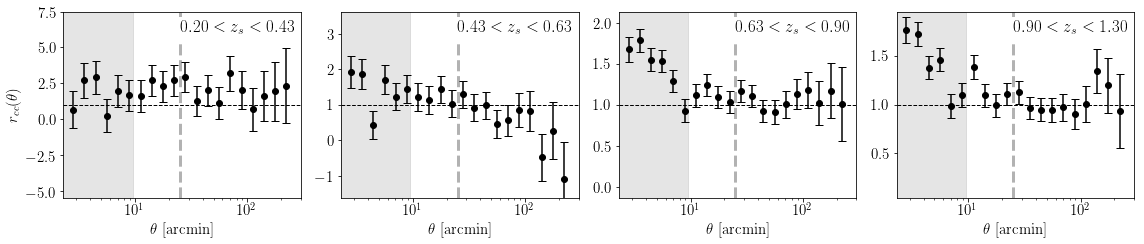

In [53]:
labels = [ '$0.20 < z_s < 0.43$' ,  '$0.43 < z_s < 0.63$' ,  '$0.63 < z_s < 0.90$' ,  '$0.90 < z_s < 1.30$'  ]

fig, ax = plt.subplots(1,4, figsize=(16,3.5))
for i in range(4):
    
    mask = (bin_no == i+1)
    
    
    ones = np.ones(ang.size)
    ax[i].errorbar( ang, data[mask]/theory[mask], yerr=error_ratio[mask], 
                   fmt='o', capsize=4, color='black' )  

    ax[i].axvspan(1, 9.5, alpha=0.2, color='grey')
    ax[i].axvline(x=25, alpha=0.3, color='k', ls='--', lw=3)
    
    ax[i].set_xscale('log')
    ax[i].set_xlabel('$\\theta$ ${\\rm [arcmin]}$', fontsize=15)
    ax[0].set_ylabel('$r_{cc} (\\theta)$', fontsize=15)
    ax[i].text(0.97, 0.95, labels[i], transform=ax[i].transAxes,fontsize=17, 
               horizontalalignment='right', verticalalignment='top', backgroundcolor='w' )
    #ax[i].set_ylim(-2,4)
    ax[i].set_xlim(2.3, 300)
    ax[i].legend(loc=1)
    ax[i].tick_params(labelsize=15)
    
    if Blind_switch:
        fit_result_x, fit_result_chi2 = fitting_constant( data[mask]/theory[mask], error_ratio[mask])
        ax[i].axhline(y=fit_result_x, ls='--', lw=1, color='k')
        
        dx = 2.5*error_ratio[mask].max()
        ax[i].set_ylim(fit_result_x-dx , fit_result_x+dx)
        ax[i].set_yticklabels([])
        ax[i].tick_params( which='major', axis='y', length = 0, width = 0, color = 'blue')
        ax[i].tick_params( which='minor', axis='y', length = 0, width = 0, color = 'blue')
    else : 
        ax[i].axhline(y=1.0, ls='--', color='k', lw=1)
        dx = 2.5*error_ratio[mask].max()
        ax[i].set_ylim(1.0-dx , 1.0+dx)
        
        cov_masked = cov_ratio[:,mask]
        cov_masked = cov_masked[mask,:]
        calculate_chi2_null( ang, data[mask]/theory[mask]-1., cov_masked, err=None, angcut=9, blind=False)
        calculate_chi2_null( ang, data[mask]/theory[mask]-1., cov_masked, err=None, angcut=27, blind=False)


plt.tight_layout()
fig.savefig(figdir+'rcc_theta.pdf')

# Appendix

### Impact of the redshift tails and bump at z~0.4

In [75]:
dir_notail = '../measurement/results/sys_ztails/theory_notail/'
dir_dmassnz = '../measurement/results/sys_ztails/theory_dmassnz/'
dir_fiducial = '../measurement/results/sys_ztails/theory_fiducial/'

theta = np.genfromtxt(dir_notail+'data_vector/2pt_angle.txt')[:20]*3437.75
xi_notail= np.genfromtxt(dir_notail+'data_vector/2pt_theory.txt') #.format(i+1)) for i in range(4)]
xi_dmassnz= np.genfromtxt(dir_dmassnz+'data_vector/2pt_theory.txt') #.format(i+1)) for i in range(4)]
xi = np.genfromtxt(dir_fiducial+'data_vector/2pt_theory.txt')
xierr = np.sqrt(np.genfromtxt(dir_fiducial+'data_vector/2pt_covariance.txt').diagonal())

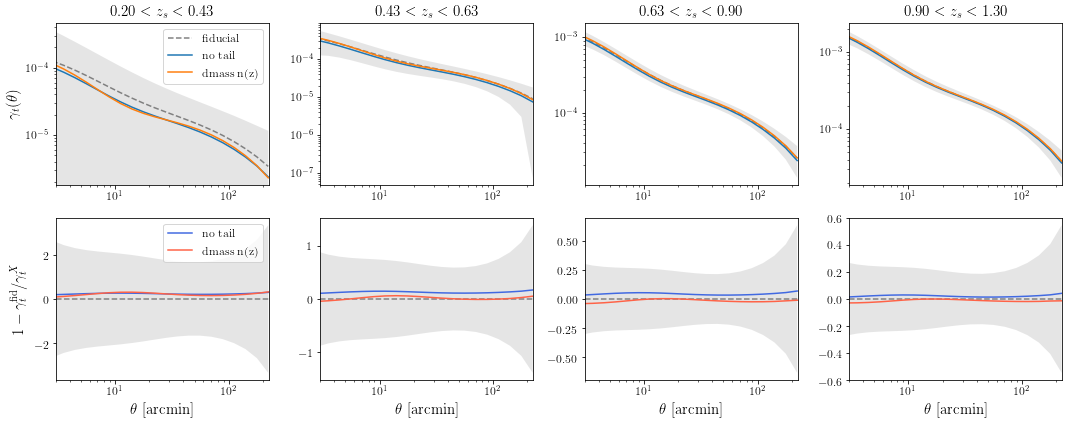

In [74]:

zrange = [ '$0.20 < z_s < 0.43$' ,  '$0.43 < z_s < 0.63$' ,  '$0.63 < z_s < 0.90$' ,  '$0.90 < z_s < 1.30$'  ]

fig, ax = plt.subplots(2,4 ,figsize=(15,6))
for i in range(4):
    ax[0,i].fill_between(theta, xi[20*i:20*(i+1)]-xierr[20*i:20*(i+1)], 
                       xi[20*i:20*(i+1)]+xierr[20*i:20*(i+1)], 
                       facecolor = 'grey',  lw = 1.8, alpha = 0.2)

    #ax[i].errorbar(theta, xi[20*i:20*(i+1)], yerr=xierr[20*i:20*(i+1)], label='default', color='grey', fmt='.')
    ax[0,i].loglog(theta, xi[20*i:20*(i+1)], label='${\\rm fiducial}$', color='grey', ls='--')
    ax[0,i].loglog(theta, xi_notail[20*i:20*(i+1)], label='${\\rm no~tail}$')
    ax[0,i].loglog(theta, xi_dmassnz[20*i:20*(i+1)], label='${\\rm dmass~n(z)}$')
    ax[0,i].set_yscale('log')
    #ax[0,i].set_xlabel('$\\theta$ ${\\rm [arcmin]}$',fontsize=15)
    ax[0,0].set_ylabel('$\gamma_t (\\theta) $',fontsize=15)
    #ax[0,i].set_xlim(2.5, 250)
    ax[0,i].set_xlim(3.0,225)
    ax[0,0].legend(loc='best', fontsize=12)
    #ax[0,i].set_ylim(1e-06, 3e-04)
    ax[0,i].set_title( zrange[i], fontsize=15 )
    ax[0,i].tick_params(labelsize=12)
    
    
    #ax[i].errorbar(theta, np.zeros(20), yerr=np.sqrt(2)*xierr[20*i:20*(i+1)]/xi[20*i:20*(i+1)], 
    #            color='grey', fmt='none', elinewidth = 5)
    ax[1,i].fill_between(theta, -np.sqrt(2)*xierr[20*i:20*(i+1)]/xi[20*i:20*(i+1)], 
                       np.sqrt(2)*xierr[20*i:20*(i+1)]/xi[20*i:20*(i+1)], facecolor = 'grey',  lw = 1.8, alpha = 0.2)

    ax[1,i].axhline( y=0.0, color='grey',ls='--' )
    ax[1,i].plot(theta, 1. - xi_notail[20*i:20*(i+1)]/xi[20*i:20*(i+1)], label='${\\rm no~tail}$', color='royalblue')
    ax[1,i].plot(theta, 1. - xi_dmassnz[20*i:20*(i+1)]/xi[20*i:20*(i+1)], label='${\\rm dmass~n(z)}$', color='tomato')
    ax[1,i].set_xscale('log')
    ax[1,i].set_xlabel('$\\theta$ ${\\rm [arcmin]}$',fontsize=15)
    ax[1,0].set_ylabel('$1-\gamma_t^{\\rm fid}/\gamma_t^{X}$',fontsize=15)
    ax[1,0].legend(loc='best',fontsize=12)
    ax[1,i].set_xlim(3.0,225)
    
    ax[1,i].tick_params(labelsize=12)
    fig.tight_layout()
    
fig.savefig(figdir + '/impact_ztail_bump.pdf')

# Save data in txt 

In [62]:
# DMASS 3x2pt measurement
fitsname = '../measurement/results/fits/measurement_y1_dmass_3x2pt.fits'

In [63]:
# data
fits = fitsio.FITS(fitsname)
data = fits['galaxy_shear_xi']['VALUE'].read()
ang = fits['galaxy_shear_xi']['ANG'].read()
bin_no = fits['galaxy_shear_xi']['BIN2'].read()

DAT = np.column_stack(( ang[:20], data[bin_no==1], data[bin_no==2], data[bin_no==3], data[bin_no==4]))
comments= \
'filename: gammat.txt \
\ndescription: DMASS galaxy-galaxy lensing (gamma_t) signals \
\n \
\nif you use this file, cite these papers below:\
\nhttp://arxiv.org/abs/1906.01136 \
\nhttp://arxiv.org/abs/2104.11319 \
\n \
\nsource redshift bins \
\nbin1 (0.20 < z_s < 0.43) \
\nbin2 (0.43 < z_s < 0.63) \
\nbin3 (0.63 < z_s < 0.90) \
\nbin4 (0.90 < z_s < 1.30) \
\n \
\nang[arcmin] \t bin1 \t bin2 \t bin3 \t bin4'
np.savetxt('../measurement/results/2pt/gammat.txt' , DAT, header=comments )

In [65]:
cat ../measurement/results/2pt/gammat.txt

# filename: gammat.txt 
# description: DMASS galaxy-galaxy lensing (gamma_t) signals 
#  
# if you use this file, cite these papers below:
# http://arxiv.org/abs/1906.01136 
# http://arxiv.org/abs/2104.11319 
#  
# source redshift bins 
# bin1 (0.20 < z_s < 0.43) 
# bin2 (0.43 < z_s < 0.63) 
# bin3 (0.63 < z_s < 0.90) 
# bin4 (0.90 < z_s < 1.30) 
#  
# ang[arcmin] 	 bin1 	 bin2 	 bin3 	 bin4
2.805046135754908576e+00 7.886742193718504967e-05 6.522840727952564132e-04 1.660511925726179889e-03 2.731837065033327228e-03
3.531343861556885511e+00 2.842597557610653056e-04 5.451029776262950217e-04 1.499881744731093635e-03 2.262311972847790530e-03
4.445698525097306231e+00 2.567787533148989452e-04 1.034479880440237684e-04 1.082755703593195557e-03 1.500633672174496967e-03
5.596802846420849242e+00 1.745361887155245481e-05 3.439744288369708542e-04 8.765207463427921375e-04 1.299361692171850180e-03
7.045957328161132516e+00 1.173494539265749483e-04 2.021175082834039758e-04 5.987688474154863718e-04 7.090

In [66]:
data = fits['galaxy_xi']['VALUE'].read()
ang = fits['galaxy_xi']['ANG'].read()

DAT = np.column_stack(( ang, data))
comments= \
'filename: wtheta.txt \
\ndescription: DMASS angular galaxy custering (w) signals \
\n \
\nif you use this file, cite these papers below:\
\nhttp://arxiv.org/abs/1906.01136 \
\nhttp://arxiv.org/abs/2104.11319 \
\n \
\nang[arcmin] \t bin1'
np.savetxt('../measurement/results/2pt/wtheta.txt' , DAT, header=comments )

In [68]:
cat ../measurement/results/2pt/wtheta.txt

# filename: wtheta.txt 
# description: DMASS angular galaxy custering (w) signals 
#  
# if you use this file, cite these papers below:
# http://arxiv.org/abs/1906.01136 
# http://arxiv.org/abs/2104.11319 
#  
# ang[arcmin] 	 bin1
2.805046135754908576e+00 2.041600000000000081e-01
3.531343861556885511e+00 1.711699999999999888e-01
4.445698525097306231e+00 1.474300000000000055e-01
5.596802846420849242e+00 1.255499999999999949e-01
7.045957328161132516e+00 1.055999999999999994e-01
8.870334730839386950e+00 8.703900000000000525e-02
1.116708980377407912e+01 7.653899999999999593e-02
1.405853312975872704e+01 6.241900000000000226e-02
1.769864460960344488e+01 5.217999999999999722e-02
2.228127345334363341e+01 4.214600000000000291e-02
2.805046135754907866e+01 3.380600000000000271e-02
3.531343861556884889e+01 2.758299999999999988e-02
4.445698525097307652e+01 2.071699999999999930e-02
5.596802846420851552e+01 1.574400000000000105e-02
7.045957328161131272e+01 1.276300000000000004e-02
8.87033473083938872

In [160]:
theta = fits['galaxy_shear_xi']['ANG'].read()[:20]
cov_FITS_DMASS = fits['COVMAT'].read()

f = open('../measurement/results/cov/cov_3x2pt.txt', 'w')
comments= \
'# filename: cov_3x2pt.txt \
\n# description: Combined covariance matrix of DMASS angular galaxy custering (w), \
\n# galaxy-galaxy lensing, DES Y1 cosmic shear computed from CosmoLike (arxiv:1601.05779). \
\n# Consists of sub-blocks for 20 cosmic shear spectra (400 bins), 4 galaxy-galaxy \
\n# lensing spectra (80 bins), 1 angular clustering spectra (20 bins). \
\n# Each sub-block has a size of 20x20. Total size is 500x500. \
\n# \
\n# if you use this file, cite these papers below:\
\n# http://arxiv.org/abs/1906.01136 \
\n# http://arxiv.org/abs/2104.11319 \
\n# https://arxiv.org/abs/1601.05779 \
\n# \
\n# bin-index1 \t bin-index2 \t cov-mat \n'
f.write(comments)

for i in range(500):
    for j in range(500):
        text = '{} \t {} \t {:1.7e}\n'.format(i+1, j+1, cov_FITS_DMASS[i][j] )
        f.write(text)
f.close()

In [161]:
cat ../measurement/results/cov/cov_3x2pt.txt

# filename: cov_3x2pt.txt 
# description: Combined covariance matrix of DMASS angular galaxy custering (w), 
# galaxy-galaxy lensing, DES Y1 cosmic shear computed from CosmoLike (arxiv:1601.05779). 
# Consists of sub-blocks for 20 cosmic shear spectra (400 bins), 4 galaxy-galaxy 
# lensing spectra (80 bins), 1 angular clustering spectra (20 bins). 
# Each sub-block has a size of 20x20. Total size is 500x500. 
# 
# if you use this file, cite these papers below:
# http://arxiv.org/abs/1906.01136 
# http://arxiv.org/abs/2104.11319 
# https://arxiv.org/abs/1601.05779 
# 
# bin-index1 	 bin-index2 	 cov-mat 
1 	 1 	 2.6800180e-10
1 	 2 	 5.9793560e-13
1 	 3 	 4.9967050e-13
1 	 4 	 4.1110400e-13
1 	 5 	 3.3505460e-13
1 	 6 	 2.7194590e-13
1 	 7 	 2.2156740e-13
1 	 8 	 1.8128820e-13
1 	 9 	 1.4989650e-13
1 	 10 	 1.2557890e-13
1 	 11 	 1.0618860e-13
1 	 12 	 9.0579940e-14
1 	 13 	 7.7197770e-14
1 	 14 	 6.5493510e-14
1 	 15 	 5.5092200e-14
1 	 16 	 4.5749260e-14
1 	 17 	 3.7339880e-14
1 	 18 

18 	 440 	 3.8746370e-14
18 	 441 	 -2.3451040e-18
18 	 442 	 -3.7148100e-18
18 	 443 	 -5.8832390e-18
18 	 444 	 -9.3136130e-18
18 	 445 	 -1.4736540e-17
18 	 446 	 -2.3305790e-17
18 	 447 	 -3.6842800e-17
18 	 448 	 -5.8176380e-17
18 	 449 	 -9.1620430e-17
18 	 450 	 -1.4373000e-16
18 	 451 	 -2.2407790e-16
18 	 452 	 -3.4564370e-16
18 	 453 	 -5.2339610e-16
18 	 454 	 -7.6544650e-16
18 	 455 	 -1.0396480e-15
18 	 456 	 -1.1573730e-15
18 	 457 	 -3.3786420e-16
18 	 458 	 6.4264360e-15
18 	 459 	 2.8802990e-14
18 	 460 	 4.8840220e-14
18 	 461 	 -2.7906970e-18
18 	 462 	 -4.4210090e-18
18 	 463 	 -7.0019870e-18
18 	 464 	 -1.1085670e-17
18 	 465 	 -1.7542450e-17
18 	 466 	 -2.7747520e-17
18 	 467 	 -4.3872650e-17
18 	 468 	 -6.9295820e-17
18 	 469 	 -1.0918110e-16
18 	 470 	 -1.7140570e-16
18 	 471 	 -2.6753050e-16
18 	 472 	 -4.1344790e-16
18 	 473 	 -6.2807150e-16
18 	 474 	 -9.2390470e-16
18 	 475 	 -1.2704180e-15
18 	 476 	 -1.4643860e-15
18 	 477 	 -6.3775660e-16
18 	 478 	 6.754

41 	 276 	 2.7210590e-14
41 	 277 	 2.4222560e-14
41 	 278 	 2.1799550e-14
41 	 279 	 1.9776270e-14
41 	 280 	 1.8009430e-14
41 	 281 	 -1.1836240e-17
41 	 282 	 -8.5549020e-18
41 	 283 	 4.5263580e-17
41 	 284 	 1.7858100e-16
41 	 285 	 3.9455990e-16
41 	 286 	 6.7813690e-16
41 	 287 	 1.0024790e-15
41 	 288 	 1.3353940e-15
41 	 289 	 1.6468240e-15
41 	 290 	 1.9162350e-15
41 	 291 	 2.1375700e-15
41 	 292 	 2.3205490e-15
41 	 293 	 2.4873310e-15
41 	 294 	 2.6674150e-15
41 	 295 	 2.8913930e-15
41 	 296 	 3.1856340e-15
41 	 297 	 3.5666380e-15
41 	 298 	 4.0363950e-15
41 	 299 	 4.5772230e-15
41 	 300 	 5.1473600e-15
41 	 301 	 -4.2933550e-15
41 	 302 	 -1.1826850e-14
41 	 303 	 -5.0552220e-15
41 	 304 	 6.5704070e-15
41 	 305 	 1.6322540e-14
41 	 306 	 2.2499040e-14
41 	 307 	 2.5335060e-14
41 	 308 	 2.5666110e-14
41 	 309 	 2.4349750e-14
41 	 310 	 2.2121040e-14
41 	 311 	 1.9543720e-14
41 	 312 	 1.7017880e-14
41 	 313 	 1.4773930e-14
41 	 314 	 1.2952520e-14
41 	 315 	 1.1598790

62 	 132 	 1.4237150e-13
62 	 133 	 1.2871380e-13
62 	 134 	 1.1526690e-13
62 	 135 	 1.0179210e-13
62 	 136 	 8.8220070e-14
62 	 137 	 7.4639260e-14
62 	 138 	 6.1291420e-14
62 	 139 	 4.8527910e-14
62 	 140 	 3.6756460e-14
62 	 141 	 1.7041480e-13
62 	 142 	 1.6923220e-13
62 	 143 	 1.6729880e-13
62 	 144 	 1.6450810e-13
62 	 145 	 1.6093860e-13
62 	 146 	 1.5675140e-13
62 	 147 	 1.5205770e-13
62 	 148 	 1.4695260e-13
62 	 149 	 1.4145520e-13
62 	 150 	 1.3551920e-13
62 	 151 	 1.2904060e-13
62 	 152 	 1.2187700e-13
62 	 153 	 1.1388780e-13
62 	 154 	 1.0495650e-13
62 	 155 	 9.5033420e-14
62 	 156 	 8.4168390e-14
62 	 157 	 7.2541990e-14
62 	 158 	 6.0485400e-14
62 	 159 	 4.8469600e-14
62 	 160 	 3.7037500e-14
62 	 161 	 5.9936490e-13
62 	 162 	 5.9542030e-13
62 	 163 	 5.3280210e-13
62 	 164 	 4.6161040e-13
62 	 165 	 4.0110650e-13
62 	 166 	 3.5151960e-13
62 	 167 	 3.1120720e-13
62 	 168 	 2.7841740e-13
62 	 169 	 2.5133170e-13
62 	 170 	 2.2818550e-13
62 	 171 	 2.0764520e-13


79 	 103 	 3.7764120e-14
79 	 104 	 3.7769420e-14
79 	 105 	 3.7777390e-14
79 	 106 	 3.7788940e-14
79 	 107 	 3.7804800e-14
79 	 108 	 3.7824570e-14
79 	 109 	 3.7845220e-14
79 	 110 	 3.7864250e-14
79 	 111 	 3.7884680e-14
79 	 112 	 3.7895870e-14
79 	 113 	 3.7909110e-14
79 	 114 	 3.7933910e-14
79 	 115 	 3.7993600e-14
79 	 116 	 3.8051640e-14
79 	 117 	 3.8057290e-14
79 	 118 	 3.7809670e-14
79 	 119 	 3.6170580e-14
79 	 120 	 3.0470330e-14
79 	 121 	 4.8276750e-14
79 	 122 	 4.8358090e-14
79 	 123 	 4.8432830e-14
79 	 124 	 4.8516600e-14
79 	 125 	 4.8594050e-14
79 	 126 	 4.8661470e-14
79 	 127 	 4.8718820e-14
79 	 128 	 4.8770340e-14
79 	 129 	 4.8787590e-14
79 	 130 	 4.8705460e-14
79 	 131 	 4.8765050e-14
79 	 132 	 4.8723070e-14
79 	 133 	 4.8767580e-14
79 	 134 	 4.9020540e-14
79 	 135 	 4.9256660e-14
79 	 136 	 4.9619650e-14
79 	 137 	 5.0195630e-14
79 	 138 	 5.1080990e-14
79 	 139 	 5.1539340e-14
79 	 140 	 4.0474280e-14
79 	 141 	 4.8391410e-14
79 	 142 	 4.8394570e-14


94 	 99 	 4.6854420e-14
94 	 100 	 3.4503370e-14
94 	 101 	 1.2251890e-13
94 	 102 	 1.2269650e-13
94 	 103 	 1.2286570e-13
94 	 104 	 1.2294850e-13
94 	 105 	 1.2257570e-13
94 	 106 	 1.2257170e-13
94 	 107 	 1.2243990e-13
94 	 108 	 1.2227660e-13
94 	 109 	 1.2279370e-13
94 	 110 	 1.2316000e-13
94 	 111 	 1.2381590e-13
94 	 112 	 1.2649950e-13
94 	 113 	 1.2955290e-13
94 	 114 	 1.3751650e-13
94 	 115 	 1.1060260e-13
94 	 116 	 9.1108760e-14
94 	 117 	 7.4724370e-14
94 	 118 	 6.0061900e-14
94 	 119 	 4.6854540e-14
94 	 120 	 3.5139050e-14
94 	 121 	 1.3654060e-13
94 	 122 	 1.3674250e-13
94 	 123 	 1.3694050e-13
94 	 124 	 1.3684390e-13
94 	 125 	 1.3636010e-13
94 	 126 	 1.3659750e-13
94 	 127 	 1.3650280e-13
94 	 128 	 1.3627220e-13
94 	 129 	 1.3687580e-13
94 	 130 	 1.3734420e-13
94 	 131 	 1.3808290e-13
94 	 132 	 1.4111020e-13
94 	 133 	 1.4440970e-13
94 	 134 	 1.5350790e-13
94 	 135 	 1.2311360e-13
94 	 136 	 1.0091980e-13
94 	 137 	 8.2321980e-14
94 	 138 	 6.5793890e-14
9

107 	 335 	 2.9015070e-14
107 	 336 	 2.7254470e-14
107 	 337 	 2.5788330e-14
107 	 338 	 2.4640950e-14
107 	 339 	 2.3702880e-14
107 	 340 	 2.2857750e-14
107 	 341 	 1.3610980e-17
107 	 342 	 4.3656050e-17
107 	 343 	 1.2892800e-16
107 	 344 	 3.3884460e-16
107 	 345 	 9.3739240e-16
107 	 346 	 2.8235910e-15
107 	 347 	 -9.0984800e-15
107 	 348 	 -4.2741690e-14
107 	 349 	 -1.8118300e-14
107 	 350 	 1.2038770e-14
107 	 351 	 2.9445390e-14
107 	 352 	 3.6261320e-14
107 	 353 	 3.7065980e-14
107 	 354 	 3.5363510e-14
107 	 355 	 3.3003050e-14
107 	 356 	 3.0834590e-14
107 	 357 	 2.9190960e-14
107 	 358 	 2.8066790e-14
107 	 359 	 2.7276050e-14
107 	 360 	 2.6625700e-14
107 	 361 	 7.3798700e-18
107 	 362 	 2.4180450e-17
107 	 363 	 7.2193920e-17
107 	 364 	 1.9003190e-16
107 	 365 	 5.2910640e-16
107 	 366 	 1.6306100e-15
107 	 367 	 -5.2497230e-15
107 	 368 	 -2.4886510e-14
107 	 369 	 -1.0411360e-14
107 	 370 	 7.4131070e-15
107 	 371 	 1.8055800e-14
107 	 372 	 2.2678020e-14
107 	 

119 	 279 	 -8.6133200e-16
119 	 280 	 -1.9616120e-15
119 	 281 	 -2.3488820e-17
119 	 282 	 -1.1891110e-17
119 	 283 	 -6.3424390e-18
119 	 284 	 -1.3016280e-17
119 	 285 	 4.6838260e-18
119 	 286 	 3.6296600e-19
119 	 287 	 -2.8760690e-18
119 	 288 	 -4.7892030e-17
119 	 289 	 -1.4980840e-19
119 	 290 	 -6.1070940e-17
119 	 291 	 -5.8525060e-17
119 	 292 	 -1.2025170e-17
119 	 293 	 4.7188910e-19
119 	 294 	 1.1687470e-18
119 	 295 	 2.9946940e-18
119 	 296 	 8.8438830e-18
119 	 297 	 3.1600500e-17
119 	 298 	 2.3898270e-16
119 	 299 	 -5.4377210e-17
119 	 300 	 -7.1738220e-15
119 	 301 	 -2.5961920e-17
119 	 302 	 -1.3647750e-17
119 	 303 	 -6.4776280e-18
119 	 304 	 -2.8903290e-17
119 	 305 	 1.7454000e-18
119 	 306 	 3.4333040e-18
119 	 307 	 -3.2938010e-18
119 	 308 	 3.2805560e-18
119 	 309 	 -1.7433510e-19
119 	 310 	 -6.6494150e-17
119 	 311 	 1.4500650e-19
119 	 312 	 -1.1853880e-17
119 	 313 	 1.1645560e-19
119 	 314 	 4.0570900e-19
119 	 315 	 8.8308780e-19
119 	 316 	 3.86

130 	 371 	 -2.7560660e-14
130 	 372 	 -1.0268020e-14
130 	 373 	 8.1291860e-15
130 	 374 	 1.8873700e-14
130 	 375 	 2.4308680e-14
130 	 376 	 2.6981480e-14
130 	 377 	 2.8509700e-14
130 	 378 	 2.9582310e-14
130 	 379 	 3.0383750e-14
130 	 380 	 3.0845380e-14
130 	 381 	 -3.7463190e-18
130 	 382 	 2.8470370e-18
130 	 383 	 7.8852200e-18
130 	 384 	 1.7020890e-17
130 	 385 	 6.1858370e-17
130 	 386 	 1.6740730e-16
130 	 387 	 4.9141620e-16
130 	 388 	 1.5770700e-15
130 	 389 	 6.3371860e-15
130 	 390 	 -4.7432650e-15
130 	 391 	 -6.0087580e-14
130 	 392 	 -2.2285950e-14
130 	 393 	 1.6290800e-14
130 	 394 	 3.7633600e-14
130 	 395 	 4.7295060e-14
130 	 396 	 5.0795850e-14
130 	 397 	 5.1605940e-14
130 	 398 	 5.1259650e-14
130 	 399 	 5.0270640e-14
130 	 400 	 4.8746770e-14
130 	 401 	 6.8305470e-16
130 	 402 	 1.0835520e-15
130 	 403 	 1.7198090e-15
130 	 404 	 2.7319270e-15
130 	 405 	 4.3461940e-15
130 	 406 	 6.9300610e-15
130 	 407 	 1.1099980e-14
130 	 408 	 1.7962270e-14
130 	 

140 	 383 	 -7.8659880e-17
140 	 384 	 -9.2495770e-17
140 	 385 	 -9.4307050e-17
140 	 386 	 9.8318160e-18
140 	 387 	 1.4562900e-17
140 	 388 	 -7.8300120e-19
140 	 389 	 -2.9662510e-19
140 	 390 	 -5.3800580e-19
140 	 391 	 -3.2434670e-20
140 	 392 	 -1.0235180e-16
140 	 393 	 6.1497960e-19
140 	 394 	 1.2118370e-18
140 	 395 	 2.8700110e-18
140 	 396 	 6.7892700e-18
140 	 397 	 1.6202870e-17
140 	 398 	 4.0069360e-17
140 	 399 	 2.1596290e-16
140 	 400 	 -1.5145760e-15
140 	 401 	 -1.2657120e-17
140 	 402 	 -2.0060580e-17
140 	 403 	 -3.1792180e-17
140 	 404 	 -5.0378170e-17
140 	 405 	 -7.9814020e-17
140 	 406 	 -1.2642250e-16
140 	 407 	 -2.0023430e-16
140 	 408 	 -3.1715920e-16
140 	 409 	 -5.0226010e-16
140 	 410 	 -7.9490500e-16
140 	 411 	 -1.2570770e-15
140 	 412 	 -1.9864640e-15
140 	 413 	 -3.1353670e-15
140 	 414 	 -4.9441130e-15
140 	 415 	 -7.7930980e-15
140 	 416 	 -1.2281590e-14
140 	 417 	 -1.9284750e-14
140 	 418 	 -2.9588710e-14
140 	 419 	 -4.0953960e-14
140 	 420 

150 	 337 	 1.0325610e-14
150 	 338 	 1.2496130e-14
150 	 339 	 1.4631060e-14
150 	 340 	 1.6550890e-14
150 	 341 	 -5.7800370e-18
150 	 342 	 3.5666590e-18
150 	 343 	 1.0002650e-17
150 	 344 	 2.0988940e-17
150 	 345 	 8.0572030e-17
150 	 346 	 2.1875680e-16
150 	 347 	 6.4811350e-16
150 	 348 	 2.1140810e-15
150 	 349 	 8.8520280e-15
150 	 350 	 -6.4147180e-15
150 	 351 	 -8.0738470e-14
150 	 352 	 -2.9553030e-14
150 	 353 	 2.1121200e-14
150 	 354 	 4.8547350e-14
150 	 355 	 6.0343270e-14
150 	 356 	 6.3867910e-14
150 	 357 	 6.3622570e-14
150 	 358 	 6.1694880e-14
150 	 359 	 5.8896310e-14
150 	 360 	 5.5584900e-14
150 	 361 	 -3.7663080e-18
150 	 362 	 1.9654760e-18
150 	 363 	 5.4362550e-18
150 	 364 	 1.0984520e-17
150 	 365 	 4.5054580e-17
150 	 366 	 1.2551570e-16
150 	 367 	 3.6361540e-16
150 	 368 	 1.1945940e-15
150 	 369 	 5.1354790e-15
150 	 370 	 -3.7471490e-15
150 	 371 	 -4.8588810e-14
150 	 372 	 -1.7499180e-14
150 	 373 	 1.3766000e-14
150 	 374 	 3.1639800e-14
150 

159 	 343 	 -7.8766490e-17
159 	 344 	 -2.8999340e-17
159 	 345 	 -4.9392460e-18
159 	 346 	 -3.9675560e-17
159 	 347 	 -1.0526020e-16
159 	 348 	 -7.6365660e-17
159 	 349 	 -1.1246600e-18
159 	 350 	 -6.6583780e-19
159 	 351 	 5.3847640e-19
159 	 352 	 4.3324610e-19
159 	 353 	 1.2812540e-18
159 	 354 	 7.9337050e-18
159 	 355 	 9.3603230e-18
159 	 356 	 2.9239380e-17
159 	 357 	 1.0391930e-16
159 	 358 	 6.6925940e-16
159 	 359 	 -3.1654350e-16
159 	 360 	 -2.1091930e-14
159 	 361 	 -3.7971700e-17
159 	 362 	 -7.1919390e-17
159 	 363 	 -5.6258360e-17
159 	 364 	 -6.0576890e-17
159 	 365 	 -2.9657830e-17
159 	 366 	 -2.4708040e-17
159 	 367 	 -2.7017060e-19
159 	 368 	 -3.7131580e-18
159 	 369 	 -7.4526150e-19
159 	 370 	 -1.0270540e-16
159 	 371 	 1.5607930e-20
159 	 372 	 -5.7934990e-19
159 	 373 	 -1.1717150e-18
159 	 374 	 -2.5554860e-20
159 	 375 	 -6.6150510e-18
159 	 376 	 -1.3704420e-17
159 	 377 	 -2.3370250e-17
159 	 378 	 1.0972130e-16
159 	 379 	 -1.5373200e-15
159 	 380 	

168 	 221 	 -1.2057240e-19
168 	 222 	 -3.1316180e-19
168 	 223 	 -8.2827700e-19
168 	 224 	 -2.2694540e-18
168 	 225 	 -6.5406020e-18
168 	 226 	 -2.0457610e-17
168 	 227 	 -7.3166400e-17
168 	 228 	 -2.8705010e-16
168 	 229 	 -5.4468700e-16
168 	 230 	 -1.9877510e-16
168 	 231 	 6.0497290e-16
168 	 232 	 1.4768770e-15
168 	 233 	 2.2455820e-15
168 	 234 	 2.9059630e-15
168 	 235 	 3.5188140e-15
168 	 236 	 4.1508690e-15
168 	 237 	 4.8493040e-15
168 	 238 	 5.6297120e-15
168 	 239 	 6.4699090e-15
168 	 240 	 7.3074220e-15
168 	 241 	 -8.4413870e-19
168 	 242 	 5.5508540e-18
168 	 243 	 1.6287570e-17
168 	 244 	 3.6256080e-17
168 	 245 	 1.0748470e-16
168 	 246 	 3.1367670e-16
168 	 247 	 9.8542370e-16
168 	 248 	 -2.9512570e-15
168 	 249 	 -1.4503260e-14
168 	 250 	 -6.0071930e-15
168 	 251 	 4.3786640e-15
168 	 252 	 1.0612520e-14
168 	 253 	 1.3425640e-14
168 	 254 	 1.4315210e-14
168 	 255 	 1.4431730e-14
168 	 256 	 1.4380940e-14
168 	 257 	 1.4435360e-14
168 	 258 	 1.4687640e-1

176 	 297 	 -1.6791610e-15
176 	 298 	 -4.0533860e-16
176 	 299 	 2.1114800e-15
176 	 300 	 4.9282460e-15
176 	 301 	 -1.2230850e-17
176 	 302 	 1.3831660e-18
176 	 303 	 -1.7538870e-17
176 	 304 	 -1.9248670e-18
176 	 305 	 -2.7798640e-17
176 	 306 	 -1.4874270e-19
176 	 307 	 -3.5790290e-19
176 	 308 	 -7.4922880e-20
176 	 309 	 -2.8582000e-19
176 	 310 	 -7.4619290e-19
176 	 311 	 -1.3098940e-18
176 	 312 	 -3.1231000e-18
176 	 313 	 -5.5530370e-18
176 	 314 	 3.1643620e-18
176 	 315 	 2.5177580e-16
176 	 316 	 -6.2245320e-16
176 	 317 	 -7.5867520e-15
176 	 318 	 -2.4462930e-15
176 	 319 	 4.4006910e-15
176 	 320 	 1.0342040e-14
176 	 321 	 -1.6299390e-17
176 	 322 	 -2.9351220e-17
176 	 323 	 -4.9291800e-17
176 	 324 	 -3.0157640e-18
176 	 325 	 -2.2183400e-19
176 	 326 	 1.8546060e-17
176 	 327 	 -5.3151340e-19
176 	 328 	 -3.9721840e-20
176 	 329 	 -2.4946850e-19
176 	 330 	 -6.6313330e-19
176 	 331 	 -7.8047440e-19
176 	 332 	 -1.6282950e-18
176 	 333 	 2.4524070e-20
176 	 334 

185 	 248 	 8.0036090e-16
185 	 249 	 1.9067810e-15
185 	 250 	 2.9766820e-15
185 	 251 	 3.8971720e-15
185 	 252 	 4.6713930e-15
185 	 253 	 5.3660160e-15
185 	 254 	 6.0689220e-15
185 	 255 	 6.8613690e-15
185 	 256 	 7.8014110e-15
185 	 257 	 8.9119340e-15
185 	 258 	 1.0170200e-14
185 	 259 	 1.1497890e-14
185 	 260 	 1.2751640e-14
185 	 261 	 1.1018890e-16
185 	 262 	 3.1169750e-16
185 	 263 	 8.4281630e-16
185 	 264 	 1.9856490e-15
185 	 265 	 -1.8994190e-14
185 	 266 	 -6.7437800e-14
185 	 267 	 -3.0210510e-14
185 	 268 	 2.2375980e-14
185 	 269 	 5.6528890e-14
185 	 270 	 7.1207360e-14
185 	 271 	 7.2996390e-14
185 	 272 	 6.8197820e-14
185 	 273 	 6.0975720e-14
185 	 274 	 5.3727790e-14
185 	 275 	 4.7524420e-14
185 	 276 	 4.2691080e-14
185 	 277 	 3.9094580e-14
185 	 278 	 3.6524090e-14
185 	 279 	 3.4615460e-14
185 	 280 	 3.2988620e-14
185 	 281 	 -4.3581870e-18
185 	 282 	 -1.1586580e-17
185 	 283 	 -3.1824340e-17
185 	 284 	 -9.1818010e-17
185 	 285 	 -2.6476000e-16
185 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




334 	 289 	 1.5939530e-16
334 	 290 	 4.0965340e-16
334 	 291 	 1.0708260e-15
334 	 292 	 2.9108360e-15
334 	 293 	 9.0979220e-15
334 	 294 	 2.4541770e-14
334 	 295 	 7.7549980e-15
334 	 296 	 2.2843870e-15
334 	 297 	 8.0525630e-16
334 	 298 	 3.0080890e-16
334 	 299 	 1.1346960e-16
334 	 300 	 4.2623070e-17
334 	 301 	 -1.5865340e-20
334 	 302 	 1.2649690e-19
334 	 303 	 4.8452380e-19
334 	 304 	 1.3383580e-18
334 	 305 	 3.5484020e-18
334 	 306 	 8.6402040e-18
334 	 307 	 2.2049580e-17
334 	 308 	 5.5838230e-17
334 	 309 	 1.4095530e-16
334 	 310 	 3.6026260e-16
334 	 311 	 9.3157580e-16
334 	 312 	 2.4782180e-15
334 	 313 	 7.3899180e-15
334 	 314 	 1.9541420e-14
334 	 315 	 6.5425740e-15
334 	 316 	 2.1079640e-15
334 	 317 	 7.8133410e-16
334 	 318 	 3.0394590e-16
334 	 319 	 1.2445050e-16
334 	 320 	 4.7056550e-17
334 	 321 	 -1.3048240e-16
334 	 322 	 -1.3620230e-16
334 	 323 	 1.1835270e-18
334 	 324 	 4.0511350e-17
334 	 325 	 7.0483550e-18
334 	 326 	 1.7350820e-17
334 	 32

338 	 371 	 2.7747960e-17
338 	 372 	 7.0076880e-17
338 	 373 	 1.6491570e-16
338 	 374 	 4.1181420e-16
338 	 375 	 1.0288000e-15
338 	 376 	 2.5771970e-15
338 	 377 	 6.5805550e-15
338 	 378 	 1.4863760e-14
338 	 379 	 6.5283300e-15
338 	 380 	 2.6927970e-15
338 	 381 	 -5.4280140e-17
338 	 382 	 -3.8504280e-17
338 	 383 	 2.7789570e-18
338 	 384 	 9.0033340e-18
338 	 385 	 -6.4233650e-18
338 	 386 	 -6.3068850e-18
338 	 387 	 -9.1327330e-18
338 	 388 	 -8.8167650e-17
338 	 389 	 6.2072530e-18
338 	 390 	 1.7591630e-17
338 	 391 	 4.6051940e-17
338 	 392 	 1.1781940e-16
338 	 393 	 2.6974650e-16
338 	 394 	 6.7779520e-16
338 	 395 	 1.7036740e-15
338 	 396 	 4.3602190e-15
338 	 397 	 1.1552820e-14
338 	 398 	 2.8199460e-14
338 	 399 	 1.0892910e-14
338 	 400 	 4.1628810e-15
338 	 401 	 1.9419800e-16
338 	 402 	 3.0769140e-16
338 	 403 	 4.8743480e-16
338 	 404 	 7.7202490e-16
338 	 405 	 1.2221340e-15
338 	 406 	 1.9337000e-15
338 	 407 	 3.0559630e-15
338 	 408 	 4.8212910e-15
338 	 

343 	 7 	 -1.8905890e-18
343 	 8 	 -6.1035190e-19
343 	 9 	 -1.5722300e-19
343 	 10 	 -4.1442750e-19
343 	 11 	 -6.5973460e-22
343 	 12 	 1.8416050e-21
343 	 13 	 -1.0021540e-19
343 	 14 	 -8.0291760e-22
343 	 15 	 -7.8384060e-22
343 	 16 	 1.3270590e-22
343 	 17 	 -5.2619710e-20
343 	 18 	 -7.0900150e-22
343 	 19 	 -6.9994160e-20
343 	 20 	 -4.6713910e-20
343 	 21 	 5.6828810e-17
343 	 22 	 -3.7006130e-17
343 	 23 	 -5.6177070e-17
343 	 24 	 -3.4409260e-17
343 	 25 	 -1.6777110e-17
343 	 26 	 -7.0659680e-18
343 	 27 	 -2.5602700e-18
343 	 28 	 -7.7750630e-19
343 	 29 	 -1.8574410e-19
343 	 30 	 -2.8805930e-20
343 	 31 	 -1.8390110e-22
343 	 32 	 1.6945560e-21
343 	 33 	 -1.1496750e-21
343 	 34 	 -1.6601300e-21
343 	 35 	 -1.4197010e-21
343 	 36 	 -1.3785110e-19
343 	 37 	 -7.6298400e-20
343 	 38 	 -1.6410130e-19
343 	 39 	 -8.6705960e-20
343 	 40 	 -1.3294150e-19
343 	 41 	 -1.4195590e-14
343 	 42 	 -3.3310760e-14
343 	 43 	 -1.1166210e-14
343 	 44 	 3.1013970e-16
343 	 45 	 3.6219840

346 	 496 	 -1.2158660e-16
346 	 497 	 -5.0481720e-17
346 	 498 	 -2.1929670e-17
346 	 499 	 6.1415440e-18
346 	 500 	 -3.2493660e-18
347 	 1 	 8.6943680e-16
347 	 2 	 7.2805680e-16
347 	 3 	 5.2847300e-16
347 	 4 	 2.7022310e-16
347 	 5 	 -7.8206650e-18
347 	 6 	 -1.8803350e-16
347 	 7 	 -1.4715560e-16
347 	 8 	 -4.8457650e-17
347 	 9 	 -1.1792970e-17
347 	 10 	 -2.1270840e-18
347 	 11 	 -1.7575510e-19
347 	 12 	 3.5504940e-20
347 	 13 	 -1.7589930e-21
347 	 14 	 -2.6111810e-20
347 	 15 	 -2.5477650e-20
347 	 16 	 -1.8359010e-20
347 	 17 	 -1.0638220e-20
347 	 18 	 -2.5596470e-19
347 	 19 	 2.0583500e-20
347 	 20 	 -2.2068130e-21
347 	 21 	 1.2943290e-15
347 	 22 	 1.0818990e-15
347 	 23 	 7.8181270e-16
347 	 24 	 3.9327970e-16
347 	 25 	 -2.4715580e-17
347 	 26 	 -2.9183730e-16
347 	 27 	 -2.1916730e-16
347 	 28 	 -6.7113140e-17
347 	 29 	 -1.5014000e-17
347 	 30 	 -2.4417090e-18
347 	 31 	 -1.7179600e-19
347 	 32 	 1.4028720e-20
347 	 33 	 -3.8983350e-20
347 	 34 	 -5.7002630e-20
34

351 	 133 	 -1.3553120e-17
351 	 134 	 -1.0568920e-17
351 	 135 	 -6.9663450e-18
351 	 136 	 -3.9505990e-18
351 	 137 	 -2.1026830e-18
351 	 138 	 -9.5034570e-19
351 	 139 	 -4.1326790e-19
351 	 140 	 -2.1221700e-19
351 	 141 	 1.7932170e-13
351 	 142 	 1.7509210e-13
351 	 143 	 1.6850390e-13
351 	 144 	 1.5821890e-13
351 	 145 	 1.4210780e-13
351 	 146 	 1.1746090e-13
351 	 147 	 8.0586300e-14
351 	 148 	 2.8521500e-14
351 	 149 	 -3.6335260e-14
351 	 150 	 -8.0738470e-14
351 	 151 	 -3.1699960e-15
351 	 152 	 6.0419200e-15
351 	 153 	 8.5205730e-16
351 	 154 	 1.5429790e-16
351 	 155 	 3.2841270e-17
351 	 156 	 8.4519200e-18
351 	 157 	 2.7114610e-18
351 	 158 	 -1.9790010e-17
351 	 159 	 5.3847640e-19
351 	 160 	 -4.5982200e-20
351 	 161 	 1.0966220e-13
351 	 162 	 1.0707850e-13
351 	 163 	 1.0305550e-13
351 	 164 	 9.6777400e-14
351 	 165 	 8.6947880e-14
351 	 166 	 7.1927240e-14
351 	 167 	 4.9480770e-14
351 	 168 	 1.7854920e-14
351 	 169 	 -2.1454200e-14
351 	 170 	 -4.8588810e-

355 	 198 	 -7.8142300e-17
355 	 199 	 -3.0542180e-17
355 	 200 	 -6.3425460e-18
355 	 201 	 3.3609180e-21
355 	 202 	 8.5436110e-21
355 	 203 	 2.1675590e-20
355 	 204 	 5.4758770e-20
355 	 205 	 1.3752430e-19
355 	 206 	 3.4464750e-19
355 	 207 	 8.6533200e-19
355 	 208 	 2.1690900e-18
355 	 209 	 5.4332390e-18
355 	 210 	 1.3587770e-17
355 	 211 	 3.3890540e-17
355 	 212 	 8.4195070e-17
355 	 213 	 2.0827180e-16
355 	 214 	 5.0807020e-16
355 	 215 	 8.6729720e-16
355 	 216 	 5.4490770e-16
355 	 217 	 2.5319410e-16
355 	 218 	 1.2134450e-16
355 	 219 	 5.8425660e-17
355 	 220 	 2.6942640e-17
355 	 221 	 4.9448040e-21
355 	 222 	 1.2597200e-20
355 	 223 	 3.2023660e-20
355 	 224 	 8.0997580e-20
355 	 225 	 2.0340830e-19
355 	 226 	 5.0955360e-19
355 	 227 	 1.2792100e-18
355 	 228 	 3.2051620e-18
355 	 229 	 8.0231440e-18
355 	 230 	 2.0045410e-17
355 	 231 	 4.9906390e-17
355 	 232 	 1.2361460e-16
355 	 233 	 3.0425330e-16
355 	 234 	 7.3779590e-16
355 	 235 	 1.2598930e-15
355 	 236

359 	 137 	 -9.6716900e-16
359 	 138 	 -3.5935870e-15
359 	 139 	 -1.8761120e-15
359 	 140 	 -4.1455130e-16
359 	 141 	 6.2832830e-14
359 	 142 	 6.2797540e-14
359 	 143 	 6.2739650e-14
359 	 144 	 6.2641970e-14
359 	 145 	 6.2497000e-14
359 	 146 	 6.2263050e-14
359 	 147 	 6.1886260e-14
359 	 148 	 6.1325410e-14
359 	 149 	 6.0361240e-14
359 	 150 	 5.8896310e-14
359 	 151 	 5.6650350e-14
359 	 152 	 5.3088710e-14
359 	 153 	 4.7621810e-14
359 	 154 	 3.9396580e-14
359 	 155 	 2.7184280e-14
359 	 156 	 1.0482630e-14
359 	 157 	 -9.4253660e-15
359 	 158 	 -2.3171440e-14
359 	 159 	 -3.1654350e-16
359 	 160 	 6.0900960e-16
359 	 161 	 4.9163970e-14
359 	 162 	 4.9135640e-14
359 	 163 	 4.9090020e-14
359 	 164 	 4.9013690e-14
359 	 165 	 4.8899990e-14
359 	 166 	 4.8716820e-14
359 	 167 	 4.8421840e-14
359 	 168 	 4.7978400e-14
359 	 169 	 4.7221270e-14
359 	 170 	 4.6072310e-14
359 	 171 	 4.4299460e-14
359 	 172 	 4.1507100e-14
359 	 173 	 3.7225710e-14
359 	 174 	 3.0799060e-14
359 	

363 	 123 	 -1.6494010e-14
363 	 124 	 8.7164260e-16
363 	 125 	 6.6830260e-16
363 	 126 	 2.9824970e-16
363 	 127 	 1.1974970e-16
363 	 128 	 4.3672350e-17
363 	 129 	 1.6553220e-17
363 	 130 	 3.6368460e-18
363 	 131 	 2.0994620e-18
363 	 132 	 4.1169310e-18
363 	 133 	 1.4765030e-19
363 	 134 	 9.8954340e-20
363 	 135 	 -6.9962910e-17
363 	 136 	 -4.9291800e-17
363 	 137 	 3.9782800e-18
363 	 138 	 -1.2243040e-17
363 	 139 	 -5.8459960e-18
363 	 140 	 -3.5862740e-17
363 	 141 	 -4.9094580e-14
363 	 142 	 -1.0822450e-13
363 	 143 	 -3.1919960e-14
363 	 144 	 3.5180650e-15
363 	 145 	 1.7833710e-15
363 	 146 	 6.7395540e-16
363 	 147 	 2.4176740e-16
363 	 148 	 8.1183370e-17
363 	 149 	 2.9823000e-17
363 	 150 	 5.4362550e-18
363 	 151 	 3.8370270e-18
363 	 152 	 9.0580070e-18
363 	 153 	 2.3081600e-19
363 	 154 	 2.0360030e-19
363 	 155 	 -6.8971680e-18
363 	 156 	 6.4561370e-19
363 	 157 	 -2.0540070e-17
363 	 158 	 -2.6013460e-17
363 	 159 	 -5.6258360e-17
363 	 160 	 -5.6490790e-1

367 	 37 	 -1.9390230e-20
367 	 38 	 -1.1906090e-20
367 	 39 	 2.7977510e-20
367 	 40 	 -3.4252700e-19
367 	 41 	 3.6544180e-14
367 	 42 	 2.9988420e-14
367 	 43 	 2.0374100e-14
367 	 44 	 7.2300810e-15
367 	 45 	 -8.0797550e-15
367 	 46 	 -1.7203100e-14
367 	 47 	 -3.7216690e-15
367 	 48 	 9.8542370e-16
367 	 49 	 3.0593850e-16
367 	 50 	 8.8946570e-17
367 	 51 	 2.4465030e-17
367 	 52 	 6.0179130e-18
367 	 53 	 1.0523070e-18
367 	 54 	 -3.9031510e-20
367 	 55 	 -2.0286510e-19
367 	 56 	 -2.0507270e-19
367 	 57 	 -1.3057560e-19
367 	 58 	 -3.2635410e-18
367 	 59 	 -3.9363200e-19
367 	 60 	 8.9222810e-19
367 	 61 	 6.0989540e-14
367 	 62 	 5.0026540e-14
367 	 63 	 3.3949240e-14
367 	 64 	 1.1979980e-14
367 	 65 	 -1.3570040e-14
367 	 66 	 -2.8719970e-14
367 	 67 	 -6.3006300e-15
367 	 68 	 1.6641100e-15
367 	 69 	 5.3190200e-16
367 	 70 	 1.5584140e-16
367 	 71 	 4.3035710e-17
367 	 72 	 -1.4078620e-16
367 	 73 	 1.9740300e-18
367 	 74 	 2.6424820e-20
367 	 75 	 -2.8599240e-19
367 	 76

370 	 322 	 1.8571630e-17
370 	 323 	 4.7524350e-17
370 	 324 	 1.2111070e-16
370 	 325 	 3.0807000e-16
370 	 326 	 8.0068210e-16
370 	 327 	 2.1161260e-15
370 	 328 	 5.8567990e-15
370 	 329 	 1.8167850e-14
370 	 330 	 3.8555510e-14
370 	 331 	 1.4860680e-14
370 	 332 	 3.9440580e-15
370 	 333 	 1.2183490e-15
370 	 334 	 4.2067210e-16
370 	 335 	 1.5822400e-16
370 	 336 	 6.4314280e-17
370 	 337 	 2.6803810e-17
370 	 338 	 9.1889830e-18
370 	 339 	 4.2741540e-18
370 	 340 	 1.9751970e-18
370 	 341 	 1.2158830e-17
370 	 342 	 3.0170440e-17
370 	 343 	 7.7394000e-17
370 	 344 	 1.9754720e-16
370 	 345 	 5.0213840e-16
370 	 346 	 1.3058220e-15
370 	 347 	 3.4637820e-15
370 	 348 	 9.6494870e-15
370 	 349 	 3.1023730e-14
370 	 350 	 6.9327120e-14
370 	 351 	 2.4932630e-14
370 	 352 	 6.5127080e-15
370 	 353 	 2.0437570e-15
370 	 354 	 7.1392000e-16
370 	 355 	 2.6512950e-16
370 	 356 	 1.0453560e-16
370 	 357 	 4.3193590e-17
370 	 358 	 1.3736990e-17
370 	 359 	 5.9072360e-18
370 	 360 	 

374 	 328 	 6.5443760e-17
374 	 329 	 1.6444150e-16
374 	 330 	 4.2123140e-16
374 	 331 	 1.0882220e-15
374 	 332 	 2.9033300e-15
374 	 333 	 8.7295770e-15
374 	 334 	 2.2137080e-14
374 	 335 	 7.7506420e-15
374 	 336 	 2.5317610e-15
374 	 337 	 1.0004880e-15
374 	 338 	 4.1181420e-16
374 	 339 	 1.7135870e-16
374 	 340 	 7.1565600e-17
374 	 341 	 -2.8240750e-20
374 	 342 	 2.5408930e-19
374 	 343 	 9.3065320e-19
374 	 344 	 2.6599580e-18
374 	 345 	 7.0448980e-18
374 	 346 	 1.7160500e-17
374 	 347 	 4.3758920e-17
374 	 348 	 1.1079470e-16
374 	 349 	 2.7951010e-16
374 	 350 	 7.1357410e-16
374 	 351 	 1.8417590e-15
374 	 352 	 4.8867000e-15
374 	 353 	 1.4519960e-14
374 	 354 	 3.8316990e-14
374 	 355 	 1.2929510e-14
374 	 356 	 4.2379070e-15
374 	 357 	 1.5975360e-15
374 	 358 	 6.2962240e-16
374 	 359 	 2.5877910e-16
374 	 360 	 9.8291080e-17
374 	 361 	 -1.8557740e-16
374 	 362 	 -9.3130630e-17
374 	 363 	 1.7511050e-18
374 	 364 	 5.7831960e-17
374 	 365 	 1.0472270e-17
374 	 366

378 	 174 	 3.0071560e-14
378 	 175 	 1.2028980e-14
378 	 176 	 -9.4178440e-15
378 	 177 	 -2.4288890e-14
378 	 178 	 -1.2238380e-15
378 	 179 	 3.2515770e-16
378 	 180 	 8.2912330e-17
378 	 181 	 8.8788920e-14
378 	 182 	 8.8706340e-14
378 	 183 	 8.8573100e-14
378 	 184 	 8.8367260e-14
378 	 185 	 8.8035080e-14
378 	 186 	 8.7507480e-14
378 	 187 	 8.6711150e-14
378 	 188 	 8.5350090e-14
378 	 189 	 8.3296370e-14
378 	 190 	 8.0125000e-14
378 	 191 	 7.5106570e-14
378 	 192 	 6.7416290e-14
378 	 193 	 5.5856460e-14
378 	 194 	 3.8738710e-14
378 	 195 	 1.5373590e-14
378 	 196 	 -1.2427600e-14
378 	 197 	 -3.1718210e-14
378 	 198 	 -1.3771710e-15
378 	 199 	 5.0347890e-16
378 	 200 	 1.5098150e-16
378 	 201 	 2.9280130e-22
378 	 202 	 7.5731730e-22
378 	 203 	 1.9743770e-21
378 	 204 	 5.1883460e-21
378 	 205 	 1.3661240e-20
378 	 206 	 3.5721510e-20
378 	 207 	 9.1688090e-20
378 	 208 	 2.3058850e-19
378 	 209 	 5.7533570e-19
378 	 210 	 1.4431440e-18
378 	 211 	 3.6100680e-18
378 	 

382 	 27 	 -1.1162980e-18
382 	 28 	 -3.3245680e-19
382 	 29 	 -7.7058690e-20
382 	 30 	 -1.1946350e-20
382 	 31 	 -2.9443420e-19
382 	 32 	 -3.2347460e-22
382 	 33 	 -8.3805900e-22
382 	 34 	 -1.4513500e-19
382 	 35 	 -1.4634470e-19
382 	 36 	 -5.0124610e-20
382 	 37 	 -6.5090350e-20
382 	 38 	 -5.4079950e-20
382 	 39 	 -5.0485410e-20
382 	 40 	 -6.2176700e-20
382 	 41 	 -4.5945780e-17
382 	 42 	 -7.8273210e-17
382 	 43 	 -5.0085440e-17
382 	 44 	 -2.5590250e-17
382 	 45 	 -1.1407880e-17
382 	 46 	 -4.4465240e-18
382 	 47 	 -1.4922140e-18
382 	 48 	 -4.2145740e-19
382 	 49 	 -9.3449120e-20
382 	 50 	 -1.5531770e-20
382 	 51 	 -1.2810590e-21
382 	 52 	 -2.3420970e-19
382 	 53 	 -2.2714620e-21
382 	 54 	 -2.3419210e-21
382 	 55 	 -1.8158950e-21
382 	 56 	 -1.1927900e-19
382 	 57 	 -1.2894230e-21
382 	 58 	 -1.4531480e-19
382 	 59 	 -6.7114660e-20
382 	 60 	 -1.4400190e-19
382 	 61 	 -7.0152060e-14
382 	 62 	 -2.4529450e-14
382 	 63 	 1.6770410e-16
382 	 64 	 5.5798770e-16
382 	 65 	 3.1

385 	 307 	 4.5469900e-16
385 	 308 	 2.2324590e-16
385 	 309 	 9.9503630e-17
385 	 310 	 4.2017960e-17
385 	 311 	 1.7332150e-17
385 	 312 	 7.1961090e-18
385 	 313 	 3.0646900e-18
385 	 314 	 1.3616800e-18
385 	 315 	 6.2342660e-19
385 	 316 	 2.7983810e-19
385 	 317 	 1.3103800e-19
385 	 318 	 6.3212290e-20
385 	 319 	 -2.7370840e-19
385 	 320 	 -2.8158290e-19
385 	 321 	 4.3113610e-15
385 	 322 	 1.1043300e-14
385 	 323 	 2.8697070e-14
385 	 324 	 7.7016780e-14
385 	 325 	 1.4140150e-13
385 	 326 	 6.9578560e-14
385 	 327 	 2.2135480e-14
385 	 328 	 6.8133940e-15
385 	 329 	 2.0852740e-15
385 	 330 	 6.4708920e-16
385 	 331 	 2.0789030e-16
385 	 332 	 6.6373410e-17
385 	 333 	 2.4299420e-17
385 	 334 	 8.5542360e-18
385 	 335 	 3.4655490e-18
385 	 336 	 -8.8156200e-17
385 	 337 	 -3.2677900e-18
385 	 338 	 -6.4233650e-18
385 	 339 	 1.3110930e-17
385 	 340 	 -9.4349660e-17
385 	 341 	 8.4510300e-17
385 	 342 	 2.0174110e-16
385 	 343 	 4.6083310e-16
385 	 344 	 9.4775380e-16
385 	 

388 	 445 	 1.3126030e-13
388 	 446 	 1.6050450e-13
388 	 447 	 1.4477690e-13
388 	 448 	 5.4229760e-14
388 	 449 	 7.5092610e-15
388 	 450 	 2.8231950e-15
388 	 451 	 1.7071970e-15
388 	 452 	 9.7160580e-16
388 	 453 	 5.1148630e-16
388 	 454 	 2.4996890e-16
388 	 455 	 1.1405960e-16
388 	 456 	 4.7342960e-17
388 	 457 	 1.7037540e-17
388 	 458 	 4.3750840e-18
388 	 459 	 1.1818910e-18
388 	 460 	 -1.1454380e-18
388 	 461 	 1.1010240e-12
388 	 462 	 1.7182340e-12
388 	 463 	 2.6534620e-12
388 	 464 	 4.0229130e-12
388 	 465 	 5.8845760e-12
388 	 466 	 7.9288740e-12
388 	 467 	 7.8910390e-12
388 	 468 	 -1.1553490e-12
388 	 469 	 -6.3776170e-13
388 	 470 	 -7.5314160e-14
388 	 471 	 -1.1833960e-14
388 	 472 	 -2.7708080e-15
388 	 473 	 -8.5028900e-16
388 	 474 	 -3.9605900e-16
388 	 475 	 -2.1388740e-16
388 	 476 	 -1.7976930e-17
388 	 477 	 1.7306420e-17
388 	 478 	 -5.2186720e-17
388 	 479 	 -4.7839700e-19
388 	 480 	 9.2283770e-18
388 	 481 	 1.2710650e-11
388 	 482 	 1.1424410e-11


392 	 302 	 4.5595250e-19
392 	 303 	 1.1437730e-18
392 	 304 	 2.8716910e-18
392 	 305 	 7.2055550e-18
392 	 306 	 1.8075190e-17
392 	 307 	 4.5291270e-17
392 	 308 	 1.1329210e-16
392 	 309 	 2.8237290e-16
392 	 310 	 6.9907940e-16
392 	 311 	 1.6727170e-15
392 	 312 	 2.7631100e-15
392 	 313 	 1.7760410e-15
392 	 314 	 7.9651830e-16
392 	 315 	 3.6388760e-16
392 	 316 	 1.7158350e-16
392 	 317 	 8.1384400e-17
392 	 318 	 3.8403550e-17
392 	 319 	 1.7529010e-17
392 	 320 	 8.1049990e-18
392 	 321 	 1.5519090e-18
392 	 322 	 3.8140440e-18
392 	 323 	 1.0094350e-17
392 	 324 	 2.5686850e-17
392 	 325 	 6.4959160e-17
392 	 326 	 1.6540140e-16
392 	 327 	 4.1918530e-16
392 	 328 	 1.0893010e-15
392 	 329 	 2.8843240e-15
392 	 330 	 7.9522670e-15
392 	 331 	 2.6425650e-14
392 	 332 	 6.2624780e-14
392 	 333 	 2.1192590e-14
392 	 334 	 5.7104180e-15
392 	 335 	 1.9147890e-15
392 	 336 	 7.0845320e-16
392 	 337 	 -3.4447600e-17
392 	 338 	 1.1781940e-16
392 	 339 	 4.5610640e-17
392 	 340 	

396 	 14 	 -1.6743250e-16
396 	 15 	 -7.5881870e-16
396 	 16 	 -3.2919470e-16
396 	 17 	 -5.9699440e-17
396 	 18 	 -3.1773390e-17
396 	 19 	 -1.4374940e-17
396 	 20 	 -5.7733400e-18
396 	 21 	 5.1319970e-15
396 	 22 	 5.1200670e-15
396 	 23 	 5.1014850e-15
396 	 24 	 5.0721320e-15
396 	 25 	 5.0254470e-15
396 	 26 	 4.9519280e-15
396 	 27 	 4.8364880e-15
396 	 28 	 4.6560680e-15
396 	 29 	 4.3764530e-15
396 	 30 	 3.9481670e-15
396 	 31 	 3.3074850e-15
396 	 32 	 2.3857160e-15
396 	 33 	 1.1564920e-15
396 	 34 	 -2.3565110e-16
396 	 35 	 -1.1352930e-15
396 	 36 	 -5.1071780e-16
396 	 37 	 -1.0334040e-16
396 	 38 	 -5.1578210e-17
396 	 39 	 -2.2393620e-17
396 	 40 	 -8.4901190e-18
396 	 41 	 7.9671960e-15
396 	 42 	 7.9485660e-15
396 	 43 	 7.9197050e-15
396 	 44 	 7.8740690e-15
396 	 45 	 7.8014110e-15
396 	 46 	 7.6869910e-15
396 	 47 	 7.5074110e-15
396 	 48 	 7.2268590e-15
396 	 49 	 6.7920320e-15
396 	 50 	 6.1263610e-15
396 	 51 	 5.1314410e-15
396 	 52 	 3.7019120e-15
396 	 53 	 

399 	 81 	 1.1445580e-14
399 	 82 	 1.1438980e-14
399 	 83 	 1.1428270e-14
399 	 84 	 1.1411090e-14
399 	 85 	 1.1383680e-14
399 	 86 	 1.1340860e-14
399 	 87 	 1.1272980e-14
399 	 88 	 1.1165590e-14
399 	 89 	 1.0996220e-14
399 	 90 	 1.0729820e-14
399 	 91 	 1.0315000e-14
399 	 92 	 9.6726940e-15
399 	 93 	 8.6910990e-15
399 	 94 	 7.2282140e-15
399 	 95 	 5.1384100e-15
399 	 96 	 2.3856210e-15
399 	 97 	 -6.6636710e-16
399 	 98 	 -2.6001210e-15
399 	 99 	 -1.3608860e-15
399 	 100 	 -3.1616340e-16
399 	 101 	 1.7779920e-14
399 	 102 	 1.7769290e-14
399 	 103 	 1.7752730e-14
399 	 104 	 1.7725790e-14
399 	 105 	 1.7682930e-14
399 	 106 	 1.7616120e-14
399 	 107 	 1.7509610e-14
399 	 108 	 1.7341880e-14
399 	 109 	 1.7077050e-14
399 	 110 	 1.6660080e-14
399 	 111 	 1.6011240e-14
399 	 112 	 1.5006390e-14
399 	 113 	 1.3471010e-14
399 	 114 	 1.1183280e-14
399 	 115 	 7.9165400e-15
399 	 116 	 3.6173020e-15
399 	 117 	 -1.1327590e-15
399 	 118 	 -4.1143890e-15
399 	 119 	 -2.1474250e-1

402 	 364 	 2.5451230e-14
402 	 365 	 2.7110410e-14
402 	 366 	 2.4394730e-14
402 	 367 	 1.9662700e-14
402 	 368 	 1.4734670e-14
402 	 369 	 1.0552040e-14
402 	 370 	 7.3797560e-15
402 	 371 	 5.1335440e-15
402 	 372 	 3.5946920e-15
402 	 373 	 2.5499550e-15
402 	 374 	 1.8334860e-15
402 	 375 	 1.3320390e-15
402 	 376 	 9.7295430e-16
402 	 377 	 7.0881300e-16
402 	 378 	 5.1085250e-16
402 	 379 	 3.6078940e-16
402 	 380 	 2.5015030e-16
402 	 381 	 4.2196740e-15
402 	 382 	 1.1278080e-14
402 	 383 	 2.3587960e-14
402 	 384 	 3.2932070e-14
402 	 385 	 3.4937140e-14
402 	 386 	 3.1302970e-14
402 	 387 	 2.5133050e-14
402 	 388 	 1.8775830e-14
402 	 389 	 1.3419780e-14
402 	 390 	 9.3792120e-15
402 	 391 	 6.5278710e-15
402 	 392 	 4.5789980e-15
402 	 393 	 3.2553440e-15
402 	 394 	 2.3470100e-15
402 	 395 	 1.7092440e-15
402 	 396 	 1.2507660e-15
402 	 397 	 9.1218910e-16
402 	 398 	 6.5745290e-16
402 	 399 	 4.6385230e-16
402 	 400 	 3.2092840e-16
402 	 401 	 8.2795620e-10
402 	 402 	 

405 	 499 	 -5.4262420e-13
405 	 500 	 -2.5501130e-13
406 	 1 	 1.2267280e-12
406 	 2 	 1.1548030e-12
406 	 3 	 1.0326790e-12
406 	 4 	 8.1395770e-13
406 	 5 	 3.7694280e-13
406 	 6 	 -3.3711790e-13
406 	 7 	 -1.8060710e-13
406 	 8 	 -5.5758770e-14
406 	 9 	 -2.0546070e-14
406 	 10 	 -9.1093900e-15
406 	 11 	 -4.7966620e-15
406 	 12 	 -2.8204410e-15
406 	 13 	 -1.7737690e-15
406 	 14 	 -1.1252130e-15
406 	 15 	 -6.8496440e-16
406 	 16 	 -4.1961980e-16
406 	 17 	 -2.4431220e-16
406 	 18 	 -1.4267400e-16
406 	 19 	 -8.4466660e-17
406 	 20 	 -4.2848260e-17
406 	 21 	 1.6218690e-12
406 	 22 	 1.5293330e-12
406 	 23 	 1.3716660e-12
406 	 24 	 1.0865120e-12
406 	 25 	 5.0517250e-13
406 	 26 	 -4.6560210e-13
406 	 27 	 -2.3566720e-13
406 	 28 	 -6.7072990e-14
406 	 29 	 -2.3472510e-14
406 	 30 	 -1.0415310e-14
406 	 31 	 -5.7311500e-15
406 	 32 	 -3.5688550e-15
406 	 33 	 -2.3163530e-15
406 	 34 	 -1.4870800e-15
406 	 35 	 -9.4084000e-16
406 	 36 	 -5.7660620e-16
406 	 37 	 -3.5015620e-16
406

409 	 415 	 8.4384890e-12
409 	 416 	 4.5493290e-12
409 	 417 	 2.3851090e-12
409 	 418 	 1.2202490e-12
409 	 419 	 6.1884790e-13
409 	 420 	 2.5498720e-13
409 	 421 	 4.1688910e-13
409 	 422 	 6.6101790e-13
409 	 423 	 1.0494680e-12
409 	 424 	 1.6693780e-12
409 	 425 	 2.6586550e-12
409 	 426 	 4.2540300e-12
409 	 427 	 6.8583550e-12
409 	 428 	 1.1203420e-11
409 	 429 	 1.5592460e-11
409 	 430 	 1.1085560e-11
409 	 431 	 6.9720470e-12
409 	 432 	 4.6877600e-12
409 	 433 	 3.2807820e-12
409 	 434 	 2.3335130e-12
409 	 435 	 1.6592140e-12
409 	 436 	 1.1648570e-12
409 	 437 	 7.9862540e-13
409 	 438 	 5.2805770e-13
409 	 439 	 3.3190470e-13
409 	 440 	 1.8480900e-13
409 	 441 	 5.2859060e-13
409 	 442 	 8.3811260e-13
409 	 443 	 1.3307140e-12
409 	 444 	 2.1171170e-12
409 	 445 	 3.3725360e-12
409 	 446 	 5.4001440e-12
409 	 447 	 8.7199730e-12
409 	 448 	 1.4318400e-11
409 	 449 	 2.0086520e-11
409 	 450 	 1.4169480e-11
409 	 451 	 8.9360050e-12
409 	 452 	 6.0676880e-12
409 	 453 	 

413 	 131 	 2.3936970e-13
413 	 132 	 1.6611540e-13
413 	 133 	 7.9125780e-14
413 	 134 	 3.7085570e-14
413 	 135 	 1.7258880e-14
413 	 136 	 5.2467270e-15
413 	 137 	 -1.3170610e-15
413 	 138 	 -4.1505710e-15
413 	 139 	 -4.5515640e-15
413 	 140 	 -3.1353670e-15
413 	 141 	 4.7147630e-13
413 	 142 	 4.7039890e-13
413 	 143 	 4.6869280e-13
413 	 144 	 4.6599250e-13
413 	 145 	 4.6172130e-13
413 	 146 	 4.5497460e-13
413 	 147 	 4.4433840e-13
413 	 148 	 4.2762480e-13
413 	 149 	 4.0150310e-13
413 	 150 	 3.6104780e-13
413 	 151 	 2.9939390e-13
413 	 152 	 2.0841350e-13
413 	 153 	 1.0006480e-13
413 	 154 	 4.7399150e-14
413 	 155 	 2.1977270e-14
413 	 156 	 6.4807180e-15
413 	 157 	 -1.9388630e-15
413 	 158 	 -5.5047580e-15
413 	 159 	 -5.9530330e-15
413 	 160 	 -4.0917480e-15
413 	 161 	 6.2115180e-13
413 	 162 	 6.1972850e-13
413 	 163 	 6.1747480e-13
413 	 164 	 6.1390770e-13
413 	 165 	 6.0826600e-13
413 	 166 	 5.9935490e-13
413 	 167 	 5.8530800e-13
413 	 168 	 5.6323860e-13
413 

416 	 212 	 -2.2209280e-16
416 	 213 	 -6.0007600e-16
416 	 214 	 -1.6903830e-15
416 	 215 	 -6.0410660e-15
416 	 216 	 -2.8657890e-14
416 	 217 	 1.0094720e-13
416 	 218 	 9.0785270e-14
416 	 219 	 6.1269800e-14
416 	 220 	 3.7306010e-14
416 	 221 	 -9.2639060e-18
416 	 222 	 -1.1550850e-17
416 	 223 	 -6.4413720e-18
416 	 224 	 -4.8412980e-18
416 	 225 	 -4.3563560e-18
416 	 226 	 -8.0109350e-19
416 	 227 	 -3.0196350e-18
416 	 228 	 -4.0069940e-18
416 	 229 	 -2.1805050e-17
416 	 230 	 -4.2933010e-17
416 	 231 	 -1.1020470e-16
416 	 232 	 -2.9437130e-16
416 	 233 	 -7.7573530e-16
416 	 234 	 -2.1479460e-15
416 	 235 	 -7.3276020e-15
416 	 236 	 -3.6322890e-14
416 	 237 	 1.4114080e-13
416 	 238 	 1.2968330e-13
416 	 239 	 8.9215620e-14
416 	 240 	 5.5442160e-14
416 	 241 	 -2.6391990e-17
416 	 242 	 -3.2976510e-17
416 	 243 	 -1.8551760e-17
416 	 244 	 -1.4192370e-17
416 	 245 	 -1.3019640e-17
416 	 246 	 -3.0014080e-18
416 	 247 	 -9.4603650e-18
416 	 248 	 -1.3155560e-17
416 	 249

420 	 138 	 2.6508640e-13
420 	 139 	 1.3330470e-13
420 	 140 	 -1.8687780e-14
420 	 141 	 6.2267900e-13
420 	 142 	 6.2261180e-13
420 	 143 	 6.2250470e-13
420 	 144 	 6.2233570e-13
420 	 145 	 6.2206720e-13
420 	 146 	 6.2164190e-13
420 	 147 	 6.2096790e-13
420 	 148 	 6.1989970e-13
420 	 149 	 6.1820610e-13
420 	 150 	 6.1552240e-13
420 	 151 	 6.1126850e-13
420 	 152 	 6.0452370e-13
420 	 153 	 5.9382620e-13
420 	 154 	 5.7684700e-13
420 	 155 	 5.4984300e-13
420 	 156 	 5.0680910e-13
420 	 157 	 4.3818320e-13
420 	 158 	 3.2959640e-13
420 	 159 	 1.6456690e-13
420 	 160 	 -2.5348630e-14
420 	 161 	 8.0941720e-13
420 	 162 	 8.0933050e-13
420 	 163 	 8.0919220e-13
420 	 164 	 8.0897430e-13
420 	 165 	 8.0862780e-13
420 	 166 	 8.0807900e-13
420 	 167 	 8.0720920e-13
420 	 168 	 8.0583050e-13
420 	 169 	 8.0364440e-13
420 	 170 	 8.0017940e-13
420 	 171 	 7.9468470e-13
420 	 172 	 7.8596720e-13
420 	 173 	 7.7212810e-13
420 	 174 	 7.5013470e-13
420 	 175 	 7.1509910e-13
420 	 176 

423 	 215 	 1.7159620e-16
423 	 216 	 1.2325510e-16
423 	 217 	 8.9005340e-17
423 	 218 	 6.4028130e-17
423 	 219 	 4.5520860e-17
423 	 220 	 3.1874880e-17
423 	 221 	 -9.2542530e-15
423 	 222 	 -2.4206620e-14
423 	 223 	 3.0988270e-14
423 	 224 	 3.4756680e-13
423 	 225 	 3.3528640e-13
423 	 226 	 2.2212030e-13
423 	 227 	 1.2865620e-13
423 	 228 	 7.0843290e-14
423 	 229 	 3.8091430e-14
423 	 230 	 2.0463690e-14
423 	 231 	 1.1151430e-14
423 	 232 	 6.1985080e-15
423 	 233 	 3.5267430e-15
423 	 234 	 2.0516770e-15
423 	 235 	 1.2183960e-15
423 	 236 	 7.3167740e-16
423 	 237 	 4.4632540e-16
423 	 238 	 2.7573280e-16
423 	 239 	 1.7012640e-16
423 	 240 	 9.4609460e-17
423 	 241 	 5.3526180e-16
423 	 242 	 1.4721970e-15
423 	 243 	 4.0879870e-15
423 	 244 	 8.6883500e-15
423 	 245 	 1.1923450e-14
423 	 246 	 1.2298330e-14
423 	 247 	 1.0718420e-14
423 	 248 	 8.4162990e-15
423 	 249 	 6.1977300e-15
423 	 250 	 4.4044870e-15
423 	 251 	 3.0849510e-15
423 	 252 	 2.1611540e-15
423 	 253 

426 	 425 	 3.5914830e-10
426 	 426 	 2.7882590e-09
426 	 427 	 2.8879010e-10
426 	 428 	 1.1714500e-10
426 	 429 	 5.8733840e-11
426 	 430 	 3.2838160e-11
426 	 431 	 1.9202940e-11
426 	 432 	 1.1381690e-11
426 	 433 	 6.7138870e-12
426 	 434 	 3.9128000e-12
426 	 435 	 2.2507670e-12
426 	 436 	 1.2672870e-12
426 	 437 	 7.0042410e-13
426 	 438 	 3.8139690e-13
426 	 439 	 2.0764500e-13
426 	 440 	 9.3450740e-14
426 	 441 	 3.5736060e-12
426 	 442 	 5.7029060e-12
426 	 443 	 9.1457780e-12
426 	 444 	 1.4771130e-11
426 	 445 	 2.3989480e-11
426 	 446 	 3.2820860e-11
426 	 447 	 2.2791500e-11
426 	 448 	 1.3127690e-11
426 	 449 	 7.8421340e-12
426 	 450 	 4.9704840e-12
426 	 451 	 3.3379830e-12
426 	 452 	 2.3398210e-12
426 	 453 	 1.6801950e-12
426 	 454 	 1.2166350e-12
426 	 455 	 8.7512970e-13
426 	 456 	 6.1674760e-13
426 	 457 	 4.2114300e-13
426 	 458 	 2.7423630e-13
426 	 459 	 1.6848250e-13
426 	 460 	 8.9920750e-14
426 	 461 	 4.0527660e-12
426 	 462 	 6.4708640e-12
426 	 463 	 

429 	 416 	 1.1648570e-12
429 	 417 	 7.9862540e-13
429 	 418 	 5.2805770e-13
429 	 419 	 3.3190470e-13
429 	 420 	 1.8480900e-13
429 	 421 	 5.5354210e-12
429 	 422 	 8.7431570e-12
429 	 423 	 1.3912050e-11
429 	 424 	 2.2356450e-11
429 	 425 	 3.5894880e-11
429 	 426 	 5.8733840e-11
429 	 427 	 9.9841710e-11
429 	 428 	 1.9481910e-10
429 	 429 	 9.0136630e-10
429 	 430 	 1.6617230e-10
429 	 431 	 8.0865430e-11
429 	 432 	 4.6236540e-11
429 	 433 	 2.7043280e-11
429 	 434 	 1.5717690e-11
429 	 435 	 9.0024350e-12
429 	 436 	 5.0715310e-12
429 	 437 	 2.8053910e-12
429 	 438 	 1.5241620e-12
429 	 439 	 8.1455920e-13
429 	 440 	 3.6515070e-13
429 	 441 	 7.6708500e-13
429 	 442 	 1.2161070e-12
429 	 443 	 1.9308160e-12
429 	 444 	 3.0722060e-12
429 	 445 	 4.8948010e-12
429 	 446 	 7.8421340e-12
429 	 447 	 1.2693480e-11
429 	 448 	 2.1005610e-11
429 	 449 	 2.9841230e-11
429 	 450 	 2.0810980e-11
429 	 451 	 1.3214600e-11
429 	 452 	 9.1245820e-12
429 	 453 	 6.5630630e-12
429 	 454 	 

432 	 422 	 1.7937920e-12
432 	 423 	 2.8427470e-12
432 	 424 	 4.5417810e-12
432 	 425 	 7.1588060e-12
432 	 426 	 1.1381690e-11
432 	 427 	 1.8116050e-11
432 	 428 	 2.8852180e-11
432 	 429 	 4.6236540e-11
432 	 430 	 7.5106420e-11
432 	 431 	 1.3101230e-10
432 	 432 	 3.6410280e-10
432 	 433 	 1.1950300e-10
432 	 434 	 6.5175380e-11
432 	 435 	 3.6895830e-11
432 	 436 	 2.0637360e-11
432 	 437 	 1.1358360e-11
432 	 438 	 6.1303590e-12
432 	 439 	 3.2800640e-12
432 	 440 	 1.4417210e-12
432 	 441 	 2.3594510e-13
432 	 442 	 3.7314660e-13
432 	 443 	 5.9112240e-13
432 	 444 	 9.3590120e-13
432 	 445 	 1.4800370e-12
432 	 446 	 2.3398210e-12
432 	 447 	 3.6922380e-12
432 	 448 	 5.8134870e-12
432 	 449 	 9.1245820e-12
432 	 450 	 1.4283070e-11
432 	 451 	 2.2532430e-11
432 	 452 	 3.1659320e-11
432 	 453 	 2.4523620e-11
432 	 454 	 1.7914280e-11
432 	 455 	 1.3203690e-11
432 	 456 	 9.4934710e-12
432 	 457 	 6.5663800e-12
432 	 458 	 4.3211210e-12
432 	 459 	 2.6627160e-12
432 	 460 	 

435 	 415 	 1.9949610e-11
435 	 416 	 1.6317640e-11
435 	 417 	 1.1812270e-11
435 	 418 	 8.0938000e-12
435 	 419 	 5.1739140e-12
435 	 420 	 2.9410980e-12
435 	 421 	 2.3057420e-13
435 	 422 	 3.5505440e-13
435 	 423 	 5.6156660e-13
435 	 424 	 9.0156990e-13
435 	 425 	 1.4157030e-12
435 	 426 	 2.2507670e-12
435 	 427 	 3.5697760e-12
435 	 428 	 5.6644270e-12
435 	 429 	 9.0024350e-12
435 	 430 	 1.4354500e-11
435 	 431 	 2.2941200e-11
435 	 432 	 3.6895830e-11
435 	 433 	 5.9964380e-11
435 	 434 	 1.0059530e-10
435 	 435 	 1.9536990e-10
435 	 436 	 9.1609500e-11
435 	 437 	 4.8568830e-11
435 	 438 	 2.5734720e-11
435 	 439 	 1.3386670e-11
435 	 440 	 5.7811290e-12
435 	 441 	 8.7624800e-14
435 	 442 	 1.3905220e-13
435 	 443 	 2.2006670e-13
435 	 444 	 3.4924640e-13
435 	 445 	 5.5274510e-13
435 	 446 	 8.7512970e-13
435 	 447 	 1.3842260e-12
435 	 448 	 2.1868290e-12
435 	 449 	 3.4506130e-12
435 	 450 	 5.4283390e-12
435 	 451 	 8.4996150e-12
435 	 452 	 1.3203690e-11
435 	 453 	 

438 	 349 	 5.0617920e-18
438 	 350 	 1.2812550e-17
438 	 351 	 3.2716340e-17
438 	 352 	 8.4202020e-17
438 	 353 	 2.2042310e-16
438 	 354 	 5.9187210e-16
438 	 355 	 1.6518820e-15
438 	 356 	 4.8883350e-15
438 	 357 	 1.5855580e-14
438 	 358 	 7.1261580e-14
438 	 359 	 2.0326730e-13
438 	 360 	 2.4055120e-13
438 	 361 	 7.8597760e-21
438 	 362 	 1.9569710e-20
438 	 363 	 4.7040960e-20
438 	 364 	 1.1625710e-19
438 	 365 	 2.7501460e-19
438 	 366 	 5.7606330e-19
438 	 367 	 1.1217220e-18
438 	 368 	 2.4940040e-18
438 	 369 	 6.4916640e-18
438 	 370 	 1.6488620e-17
438 	 371 	 4.2183950e-17
438 	 372 	 1.0889730e-16
438 	 373 	 2.8591530e-16
438 	 374 	 7.7090650e-16
438 	 375 	 2.1627960e-15
438 	 376 	 6.4391570e-15
438 	 377 	 2.1041590e-14
438 	 378 	 9.5007360e-14
438 	 379 	 2.7079960e-13
438 	 380 	 3.1992550e-13
438 	 381 	 9.7727670e-21
438 	 382 	 2.4275970e-20
438 	 383 	 5.8099470e-20
438 	 384 	 1.4381380e-19
438 	 385 	 3.4136700e-19
438 	 386 	 7.1488400e-19
438 	 387 	 

441 	 494 	 1.5442920e-12
441 	 495 	 -9.9858720e-15
441 	 496 	 -7.5215790e-13
441 	 497 	 -9.9502790e-13
441 	 498 	 -9.0185570e-13
441 	 499 	 -7.0634880e-13
441 	 500 	 -2.7680970e-13
442 	 1 	 8.8636180e-15
442 	 2 	 5.8662740e-15
442 	 3 	 3.4300390e-15
442 	 4 	 1.9036470e-15
442 	 5 	 1.0585730e-15
442 	 6 	 6.2768250e-16
442 	 7 	 4.1465910e-16
442 	 8 	 3.0207240e-16
442 	 9 	 2.3039370e-16
442 	 10 	 1.7486900e-16
442 	 11 	 1.2846260e-16
442 	 12 	 8.9762050e-17
442 	 13 	 5.8508180e-17
442 	 14 	 3.4634500e-17
442 	 15 	 1.7608330e-17
442 	 16 	 6.1885380e-18
442 	 17 	 -5.0279690e-19
442 	 18 	 -3.7148100e-18
442 	 19 	 -4.4899700e-18
442 	 20 	 -3.4812460e-18
442 	 21 	 1.8321410e-14
442 	 22 	 1.1922880e-14
442 	 23 	 6.8090160e-15
442 	 24 	 3.7046140e-15
442 	 25 	 2.0547140e-15
442 	 26 	 1.2491430e-15
442 	 27 	 8.6060970e-16
442 	 28 	 6.4909740e-16
442 	 29 	 5.0318000e-16
442 	 30 	 3.8268140e-16
442 	 31 	 2.7905010e-16
442 	 32 	 1.9238830e-16
442 	 33 	 1.2325

444 	 428 	 5.0276190e-12
444 	 429 	 3.0722060e-12
444 	 430 	 1.9746790e-12
444 	 431 	 1.3336540e-12
444 	 432 	 9.3590120e-13
444 	 433 	 6.7200640e-13
444 	 434 	 4.8588480e-13
444 	 435 	 3.4924640e-13
444 	 436 	 2.4567920e-13
444 	 437 	 1.6774550e-13
444 	 438 	 1.0928480e-13
444 	 439 	 6.6980630e-14
444 	 440 	 3.5823560e-14
444 	 441 	 1.7369750e-10
444 	 442 	 3.0110760e-10
444 	 443 	 5.5444450e-10
444 	 444 	 6.2230210e-09
444 	 445 	 4.5546650e-10
444 	 446 	 1.8758100e-10
444 	 447 	 8.5662770e-11
444 	 448 	 4.3594310e-11
444 	 449 	 2.4136550e-11
444 	 450 	 1.4157580e-11
444 	 451 	 8.5427810e-12
444 	 452 	 5.2404590e-12
444 	 453 	 3.2228840e-12
444 	 454 	 1.9779660e-12
444 	 455 	 1.2056970e-12
444 	 456 	 7.2961360e-13
444 	 457 	 4.3182880e-13
444 	 458 	 2.5103680e-13
444 	 459 	 1.3741420e-13
444 	 460 	 3.5202740e-14
444 	 461 	 1.8583860e-11
444 	 462 	 2.9830710e-11
444 	 463 	 4.7972550e-11
444 	 464 	 6.5052110e-11
444 	 465 	 4.5554540e-11
444 	 466 	 

447 	 346 	 -3.7691450e-13
447 	 347 	 -3.3674290e-13
447 	 348 	 2.7874950e-12
447 	 349 	 2.3036680e-12
447 	 350 	 1.4075720e-12
447 	 351 	 8.1627530e-13
447 	 352 	 4.7289960e-13
447 	 353 	 2.7728020e-13
447 	 354 	 1.6453790e-13
447 	 355 	 9.8524170e-14
447 	 356 	 5.9299250e-14
447 	 357 	 3.5709600e-14
447 	 358 	 2.1461300e-14
447 	 359 	 1.2765230e-14
447 	 360 	 7.7068200e-15
447 	 361 	 -8.3955680e-16
447 	 362 	 -2.6244700e-15
447 	 363 	 -6.8548880e-15
447 	 364 	 -2.0212900e-14
447 	 365 	 -6.7849310e-14
447 	 366 	 -2.8306710e-13
447 	 367 	 -2.5164260e-13
447 	 368 	 2.1626170e-12
447 	 369 	 1.8003350e-12
447 	 370 	 1.1162190e-12
447 	 371 	 6.5928240e-13
447 	 372 	 3.9005730e-13
447 	 373 	 2.3413440e-13
447 	 374 	 1.4279340e-13
447 	 375 	 8.8209740e-14
447 	 376 	 5.5001530e-14
447 	 377 	 3.4471820e-14
447 	 378 	 2.1606400e-14
447 	 379 	 1.3407600e-14
447 	 380 	 8.4187850e-15
447 	 381 	 2.8555390e-17
447 	 382 	 7.6371120e-17
447 	 383 	 2.1257860e-16
447

450 	 133 	 2.9786310e-14
450 	 134 	 1.6091420e-14
450 	 135 	 6.7846510e-15
450 	 136 	 1.0735960e-15
450 	 137 	 -1.8912750e-15
450 	 138 	 -2.9397370e-15
450 	 139 	 -2.7994390e-15
450 	 140 	 -1.7635500e-15
450 	 141 	 4.6651170e-12
450 	 142 	 4.6270640e-12
450 	 143 	 4.5674900e-12
450 	 144 	 4.4723740e-12
450 	 145 	 4.3200280e-12
450 	 146 	 4.0760880e-12
450 	 147 	 3.6791320e-12
450 	 148 	 3.0097490e-12
450 	 149 	 1.7080120e-12
450 	 150 	 -1.0312700e-12
450 	 151 	 -2.8056150e-13
450 	 152 	 -8.6614000e-14
450 	 153 	 -5.1270250e-14
450 	 154 	 -3.5831460e-14
450 	 155 	 -2.6137770e-14
450 	 156 	 -1.9204760e-14
450 	 157 	 -1.4072770e-14
450 	 158 	 -1.0073040e-14
450 	 159 	 -7.0894080e-15
450 	 160 	 -3.5979400e-15
450 	 161 	 3.9733550e-12
450 	 162 	 3.9406810e-12
450 	 163 	 3.8895090e-12
450 	 164 	 3.8079550e-12
450 	 165 	 3.6775160e-12
450 	 166 	 3.4691860e-12
450 	 167 	 3.1319650e-12
450 	 168 	 2.5694520e-12
450 	 169 	 1.5030140e-12
450 	 170 	 -6.7652610e

452 	 416 	 6.0517260e-12
452 	 417 	 4.1879380e-12
452 	 418 	 2.7754490e-12
452 	 419 	 1.7340620e-12
452 	 420 	 9.5274360e-13
452 	 421 	 2.3594510e-13
452 	 422 	 3.7314660e-13
452 	 423 	 5.9112240e-13
452 	 424 	 9.3590120e-13
452 	 425 	 1.4800370e-12
452 	 426 	 2.3398210e-12
452 	 427 	 3.6922380e-12
452 	 428 	 5.8134870e-12
452 	 429 	 9.1245820e-12
452 	 430 	 1.4283070e-11
452 	 431 	 2.2532430e-11
452 	 432 	 3.1659320e-11
452 	 433 	 2.4523620e-11
452 	 434 	 1.7914280e-11
452 	 435 	 1.3203690e-11
452 	 436 	 9.4934710e-12
452 	 437 	 6.5663800e-12
452 	 438 	 4.3211210e-12
452 	 439 	 2.6627160e-12
452 	 440 	 1.4241890e-12
452 	 441 	 1.3200210e-12
452 	 442 	 2.0729260e-12
452 	 443 	 3.2845680e-12
452 	 444 	 5.2404590e-12
452 	 445 	 8.2628390e-12
452 	 446 	 1.3122590e-11
452 	 447 	 2.0853020e-11
452 	 448 	 3.3135150e-11
452 	 449 	 5.2889440e-11
452 	 450 	 8.5330300e-11
452 	 451 	 1.4654070e-10
452 	 452 	 3.8126410e-10
452 	 453 	 1.3770280e-10
452 	 454 	 

455 	 425 	 5.5274510e-13
455 	 426 	 8.7512970e-13
455 	 427 	 1.3842260e-12
455 	 428 	 2.1868290e-12
455 	 429 	 3.4506130e-12
455 	 430 	 5.4283390e-12
455 	 431 	 8.4996150e-12
455 	 432 	 1.3203690e-11
455 	 433 	 2.0230240e-11
455 	 434 	 3.0317500e-11
455 	 435 	 4.0387150e-11
455 	 436 	 3.3573990e-11
455 	 437 	 2.4570140e-11
455 	 438 	 1.6739770e-11
455 	 439 	 1.0479120e-11
455 	 440 	 5.7305500e-12
455 	 441 	 3.0702840e-13
455 	 442 	 4.7624770e-13
455 	 443 	 7.5360290e-13
455 	 444 	 1.2056970e-12
455 	 445 	 1.8973460e-12
455 	 446 	 3.0147300e-12
455 	 447 	 4.7751900e-12
455 	 448 	 7.5716240e-12
455 	 449 	 1.2002880e-11
455 	 450 	 1.9063190e-11
455 	 451 	 3.0282800e-11
455 	 452 	 4.8223490e-11
455 	 453 	 7.7104050e-11
455 	 454 	 1.2561290e-10
455 	 455 	 2.2639890e-10
455 	 456 	 1.2009660e-10
455 	 457 	 7.0021970e-11
455 	 458 	 4.0256810e-11
455 	 459 	 2.2154940e-11
455 	 460 	 1.0213250e-11
455 	 461 	 1.7712590e-13
455 	 462 	 2.8108720e-13
455 	 463 	 

458 	 343 	 -1.4215000e-17
458 	 344 	 1.4374100e-18
458 	 345 	 2.5928250e-17
458 	 346 	 1.3015100e-18
458 	 347 	 -1.4066310e-18
458 	 348 	 -1.4948650e-17
458 	 349 	 -9.4518260e-18
458 	 350 	 -1.5732830e-17
458 	 351 	 -6.2625470e-17
458 	 352 	 -1.6866980e-16
458 	 353 	 -4.3328970e-16
458 	 354 	 -1.0924620e-15
458 	 355 	 -2.8084350e-15
458 	 356 	 -7.2535600e-15
458 	 357 	 -2.1155230e-14
458 	 358 	 -6.8157830e-14
458 	 359 	 7.3923140e-13
458 	 360 	 7.2339660e-13
458 	 361 	 -1.8048810e-17
458 	 362 	 -1.3122940e-19
458 	 363 	 -1.1131260e-17
458 	 364 	 9.3554420e-19
458 	 365 	 1.9733320e-17
458 	 366 	 1.4891960e-19
458 	 367 	 -2.0267970e-18
458 	 368 	 -1.1721970e-17
458 	 369 	 -4.6211960e-18
458 	 370 	 -3.5907830e-18
458 	 371 	 -2.7447150e-17
458 	 372 	 -7.2220670e-17
458 	 373 	 -1.7554490e-16
458 	 374 	 -3.9646960e-16
458 	 375 	 -8.5905530e-16
458 	 376 	 -1.5448320e-15
458 	 377 	 -2.6191820e-15
458 	 378 	 1.1357790e-14
458 	 379 	 7.4440450e-13
458 	 380 	

461 	 74 	 4.9938600e-17
461 	 75 	 -1.6911730e-18
461 	 76 	 -3.2471190e-17
461 	 77 	 -7.3710570e-17
461 	 78 	 -4.9396120e-17
461 	 79 	 -4.8719300e-18
461 	 80 	 -9.8839200e-18
461 	 81 	 2.3250740e-14
461 	 82 	 1.3763010e-14
461 	 83 	 7.5930350e-15
461 	 84 	 4.1107810e-15
461 	 85 	 2.3607630e-15
461 	 86 	 1.5462250e-15
461 	 87 	 1.1541740e-15
461 	 88 	 9.1828990e-16
461 	 89 	 7.2982950e-16
461 	 90 	 5.5915590e-16
461 	 91 	 4.0646340e-16
461 	 92 	 2.7712720e-16
461 	 93 	 1.7402290e-16
461 	 94 	 9.6879880e-17
461 	 95 	 4.2981060e-17
461 	 96 	 9.1052680e-18
461 	 97 	 -9.2988310e-18
461 	 98 	 -1.6395220e-17
461 	 99 	 -1.6301000e-17
461 	 100 	 -1.1357670e-17
461 	 101 	 4.8445740e-14
461 	 102 	 2.8111470e-14
461 	 103 	 1.5248820e-14
461 	 104 	 8.2329880e-15
461 	 105 	 4.8346110e-15
461 	 106 	 3.2932150e-15
461 	 107 	 2.5370100e-15
461 	 108 	 2.0454530e-15
461 	 109 	 1.6251620e-15
461 	 110 	 1.2360490e-15
461 	 111 	 8.8948890e-16
461 	 112 	 5.9808270e-16
46

463 	 417 	 7.6111550e-14
463 	 418 	 5.0102230e-14
463 	 419 	 3.1644520e-14
463 	 420 	 1.6827630e-14
463 	 421 	 1.9508320e-11
463 	 422 	 3.0746110e-11
463 	 423 	 4.0893820e-11
463 	 424 	 2.9937070e-11
463 	 425 	 1.7879900e-11
463 	 426 	 1.0387360e-11
463 	 427 	 6.0247500e-12
463 	 428 	 3.5702610e-12
463 	 429 	 2.2026720e-12
463 	 430 	 1.4295370e-12
463 	 431 	 9.7423350e-13
463 	 432 	 6.8912070e-13
463 	 433 	 4.9739250e-13
463 	 434 	 3.6141640e-13
463 	 435 	 2.5962180e-13
463 	 436 	 1.8296120e-13
463 	 437 	 1.2410370e-13
463 	 438 	 8.0720550e-14
463 	 439 	 4.8995540e-14
463 	 440 	 2.5946520e-14
463 	 441 	 3.1407520e-11
463 	 442 	 4.9978670e-11
463 	 443 	 6.6957460e-11
463 	 444 	 4.7972550e-11
463 	 445 	 2.7941710e-11
463 	 446 	 1.5968360e-11
463 	 447 	 9.2069810e-12
463 	 448 	 5.4853710e-12
463 	 449 	 3.4356750e-12
463 	 450 	 2.2745390e-12
463 	 451 	 1.5858760e-12
463 	 452 	 1.1437130e-12
463 	 453 	 8.3882890e-13
463 	 454 	 6.1617770e-13
463 	 455 	 

466 	 205 	 5.8463880e-16
466 	 206 	 2.1389330e-15
466 	 207 	 5.1036860e-15
466 	 208 	 6.5017720e-15
466 	 209 	 6.0061420e-15
466 	 210 	 4.7723930e-15
466 	 211 	 3.5294270e-15
466 	 212 	 2.5364430e-15
466 	 213 	 1.8110100e-15
466 	 214 	 1.3007380e-15
466 	 215 	 9.4300550e-16
466 	 216 	 6.8771070e-16
466 	 217 	 5.0241020e-16
466 	 218 	 3.6422570e-16
466 	 219 	 2.5955200e-16
466 	 220 	 1.8135140e-16
466 	 221 	 1.5015280e-17
466 	 222 	 4.0400360e-17
466 	 223 	 1.1340550e-16
466 	 224 	 3.4162260e-16
466 	 225 	 1.1580680e-15
466 	 226 	 4.4207750e-15
466 	 227 	 1.0707870e-14
466 	 228 	 1.3534590e-14
466 	 229 	 1.2361960e-14
466 	 230 	 9.7430770e-15
466 	 231 	 7.1875480e-15
466 	 232 	 5.1773020e-15
466 	 233 	 3.7224930e-15
466 	 234 	 2.6977980e-15
466 	 235 	 1.9732300e-15
466 	 236 	 1.4510110e-15
466 	 237 	 1.0655590e-15
466 	 238 	 7.7436500e-16
466 	 239 	 5.5111120e-16
466 	 240 	 3.8361620e-16
466 	 241 	 3.1071930e-17
466 	 242 	 8.3918700e-17
466 	 243 	 

469 	 137 	 -4.0245420e-15
469 	 138 	 -3.5785530e-15
469 	 139 	 -2.7904910e-15
469 	 140 	 -1.6145150e-15
469 	 141 	 7.2488170e-13
469 	 142 	 7.1516950e-13
469 	 143 	 6.9981230e-13
469 	 144 	 6.7556260e-13
469 	 145 	 6.3735850e-13
469 	 146 	 5.7740870e-13
469 	 147 	 4.8412940e-13
469 	 148 	 3.4330710e-13
469 	 149 	 1.7909230e-13
469 	 150 	 1.0567020e-13
469 	 151 	 7.5068630e-14
469 	 152 	 5.0132070e-14
469 	 153 	 3.0335040e-14
469 	 154 	 1.5814720e-14
469 	 155 	 6.0503540e-15
469 	 156 	 2.2357150e-16
469 	 157 	 -2.6311130e-15
469 	 158 	 -3.4630090e-15
469 	 159 	 -3.0966690e-15
469 	 160 	 -1.8489440e-15
469 	 161 	 5.3174810e-12
469 	 162 	 5.2516700e-12
469 	 163 	 5.1468110e-12
469 	 164 	 4.9780460e-12
469 	 165 	 4.7063220e-12
469 	 166 	 4.2600740e-12
469 	 167 	 3.4944620e-12
469 	 168 	 1.9659820e-12
469 	 169 	 -1.0865400e-12
469 	 170 	 -2.9564890e-13
469 	 171 	 -4.3502960e-14
469 	 172 	 -1.3899810e-14
469 	 173 	 -1.1363480e-14
469 	 174 	 -1.2344840e-1

471 	 497 	 -1.5180050e-10
471 	 498 	 -1.3851910e-10
471 	 499 	 -1.0110830e-10
471 	 500 	 -4.0032610e-11
472 	 1 	 6.3601020e-14
472 	 2 	 6.3379100e-14
472 	 3 	 6.3027770e-14
472 	 4 	 6.2471880e-14
472 	 5 	 6.1593200e-14
472 	 6 	 6.0206260e-14
472 	 7 	 5.8022690e-14
472 	 8 	 5.4598890e-14
472 	 9 	 4.9267190e-14
472 	 10 	 4.1064110e-14
472 	 11 	 2.8787180e-14
472 	 12 	 1.4209640e-14
472 	 13 	 7.4722390e-15
472 	 14 	 4.3474160e-15
472 	 15 	 2.1806660e-15
472 	 16 	 7.7605280e-16
472 	 17 	 -3.5550360e-17
472 	 18 	 -4.1344790e-16
472 	 19 	 -5.0197550e-16
472 	 20 	 -3.8531660e-16
472 	 21 	 1.3295320e-13
472 	 22 	 1.3248970e-13
472 	 23 	 1.3175600e-13
472 	 24 	 1.3059540e-13
472 	 25 	 1.2876120e-13
472 	 26 	 1.2586730e-13
472 	 27 	 1.2131410e-13
472 	 28 	 1.1418200e-13
472 	 29 	 1.0309350e-13
472 	 30 	 8.6071330e-14
472 	 31 	 6.0640070e-14
472 	 32 	 3.0314280e-14
472 	 33 	 1.6040600e-14
472 	 34 	 9.1206890e-15
472 	 35 	 4.3620110e-15
472 	 36 	 1.3428680e-

474 	 135 	 -2.1585990e-14
474 	 136 	 -3.2418080e-14
474 	 137 	 -3.7630530e-14
474 	 138 	 -3.4909470e-14
474 	 139 	 -2.7473640e-14
474 	 140 	 -1.5670390e-14
474 	 141 	 1.3742580e-12
474 	 142 	 1.3721680e-12
474 	 143 	 1.3688570e-12
474 	 144 	 1.3636140e-12
474 	 145 	 1.3553190e-12
474 	 146 	 1.3422050e-12
474 	 147 	 1.3215080e-12
474 	 148 	 1.2889210e-12
474 	 149 	 1.2378270e-12
474 	 150 	 1.1582560e-12
474 	 151 	 1.0357800e-12
474 	 152 	 8.5119190e-13
474 	 153 	 5.8394940e-13
474 	 154 	 2.6645830e-13
474 	 155 	 1.0194610e-13
474 	 156 	 2.1613910e-14
474 	 157 	 -1.8159840e-14
474 	 158 	 -3.1648020e-14
474 	 159 	 -2.9692700e-14
474 	 160 	 -1.8313750e-14
474 	 161 	 4.0899870e-12
474 	 162 	 4.0839370e-12
474 	 163 	 4.0740280e-12
474 	 164 	 4.0587790e-12
474 	 165 	 4.0347400e-12
474 	 166 	 3.9961040e-12
474 	 167 	 3.9352630e-12
474 	 168 	 3.8389250e-12
474 	 169 	 3.6858920e-12
474 	 170 	 3.4436890e-12
474 	 171 	 3.0600800e-12
474 	 172 	 2.4512000e-12
47

476 	 348 	 3.0944920e-17
476 	 349 	 7.8302190e-17
476 	 350 	 1.9951470e-16
476 	 351 	 5.1158670e-16
476 	 352 	 1.3265790e-15
476 	 353 	 3.5031760e-15
476 	 354 	 9.5289720e-15
476 	 355 	 2.7186230e-14
476 	 356 	 1.0394320e-13
476 	 357 	 2.8611340e-13
476 	 358 	 3.5372910e-13
476 	 359 	 3.2621370e-13
476 	 360 	 2.5633640e-13
476 	 361 	 -4.4377830e-17
476 	 362 	 -5.5427050e-17
476 	 363 	 -3.1037770e-17
476 	 364 	 -2.3150060e-17
476 	 365 	 -1.9600060e-17
476 	 366 	 9.0201200e-19
476 	 367 	 -1.1698420e-18
476 	 368 	 1.5286040e-17
476 	 369 	 -1.8215310e-17
476 	 370 	 1.9209270e-17
476 	 371 	 5.1507680e-17
476 	 372 	 1.0590600e-16
476 	 373 	 3.4669610e-16
476 	 374 	 9.4126440e-16
476 	 375 	 -1.4381880e-15
476 	 376 	 -4.6200750e-14
476 	 377 	 9.6670800e-13
476 	 378 	 9.9375680e-13
476 	 379 	 7.7597580e-13
476 	 380 	 5.3682040e-13
476 	 381 	 -1.3800190e-16
476 	 382 	 -1.7208310e-16
476 	 383 	 -9.5476330e-17
476 	 384 	 -7.1217490e-17
476 	 385 	 -6.3173080e-1

479 	 81 	 4.1263560e-13
479 	 82 	 4.1256070e-13
479 	 83 	 4.1244230e-13
479 	 84 	 4.1225440e-13
479 	 85 	 4.1195680e-13
479 	 86 	 4.1148480e-13
479 	 87 	 4.1073700e-13
479 	 88 	 4.0955220e-13
479 	 89 	 4.0767520e-13
479 	 90 	 4.0470220e-13
479 	 91 	 3.9999490e-13
479 	 92 	 3.9254860e-13
479 	 93 	 3.8077950e-13
479 	 94 	 3.6221670e-13
479 	 95 	 3.3306470e-13
479 	 96 	 2.8763490e-13
479 	 97 	 2.1803770e-13
479 	 98 	 1.1629600e-13
479 	 99 	 1.3279600e-15
479 	 100 	 -3.4762050e-14
479 	 101 	 8.5830210e-13
479 	 102 	 8.5814560e-13
479 	 103 	 8.5789830e-13
479 	 104 	 8.5750540e-13
479 	 105 	 8.5688320e-13
479 	 106 	 8.5589690e-13
479 	 107 	 8.5433390e-13
479 	 108 	 8.5185730e-13
479 	 109 	 8.4793390e-13
479 	 110 	 8.4171930e-13
479 	 111 	 8.3187900e-13
479 	 112 	 8.1630950e-13
479 	 113 	 7.9169890e-13
479 	 114 	 7.5287590e-13
479 	 115 	 6.9186160e-13
479 	 116 	 5.9665150e-13
479 	 117 	 4.5042660e-13
479 	 118 	 2.3599200e-13
479 	 119 	 -5.8192510e-15
479

482 	 3 	 5.9003960e-12
482 	 4 	 5.7829120e-12
482 	 5 	 5.6408420e-12
482 	 6 	 5.4815130e-12
482 	 7 	 5.3046830e-12
482 	 8 	 5.1061860e-12
482 	 9 	 4.8793070e-12
482 	 10 	 4.6165490e-12
482 	 11 	 4.3107250e-12
482 	 12 	 3.9568500e-12
482 	 13 	 3.5536560e-12
482 	 14 	 3.1052690e-12
482 	 15 	 2.6228540e-12
482 	 16 	 2.1248370e-12
482 	 17 	 1.6364530e-12
482 	 18 	 1.1862570e-12
482 	 19 	 8.0142360e-13
482 	 20 	 4.9991230e-13
482 	 21 	 1.5790070e-11
482 	 22 	 1.5674500e-11
482 	 23 	 1.5456780e-11
482 	 24 	 1.5144820e-11
482 	 25 	 1.4769750e-11
482 	 26 	 1.4351300e-11
482 	 27 	 1.3886970e-11
482 	 28 	 1.3364860e-11
482 	 29 	 1.2763950e-11
482 	 30 	 1.2063500e-11
482 	 31 	 1.1244340e-11
482 	 32 	 1.0293110e-11
482 	 33 	 9.2072870e-12
482 	 34 	 8.0000680e-12
482 	 35 	 6.7035280e-12
482 	 36 	 5.3712370e-12
482 	 37 	 4.0744340e-12
482 	 38 	 2.8920290e-12
482 	 39 	 1.8979800e-12
482 	 40 	 1.1383710e-12
482 	 41 	 4.2108630e-11
482 	 42 	 4.1801250e-11
482 	 4

484 	 164 	 4.2530680e-10
484 	 165 	 4.1731240e-10
484 	 166 	 4.0602250e-10
484 	 167 	 3.9288060e-10
484 	 168 	 3.7786270e-10
484 	 169 	 3.6022200e-10
484 	 170 	 3.3932510e-10
484 	 171 	 3.1454730e-10
484 	 172 	 2.8552050e-10
484 	 173 	 2.5230900e-10
484 	 174 	 2.1548750e-10
484 	 175 	 1.7633740e-10
484 	 176 	 1.3678030e-10
484 	 177 	 9.9239750e-11
484 	 178 	 6.6217260e-11
484 	 179 	 3.9886450e-11
484 	 180 	 2.1179840e-11
484 	 181 	 6.5410620e-10
484 	 182 	 6.5313410e-10
484 	 183 	 6.5104760e-10
484 	 184 	 6.4558600e-10
484 	 185 	 6.3341450e-10
484 	 186 	 6.1623450e-10
484 	 187 	 5.9622620e-10
484 	 188 	 5.7332300e-10
484 	 189 	 5.4635540e-10
484 	 190 	 5.1436620e-10
484 	 191 	 4.7640980e-10
484 	 192 	 4.3194030e-10
484 	 193 	 3.8108170e-10
484 	 194 	 3.2477800e-10
484 	 195 	 2.6501640e-10
484 	 196 	 2.0481550e-10
484 	 197 	 1.4785350e-10
484 	 198 	 9.7993580e-11
484 	 199 	 5.8505750e-11
484 	 200 	 3.0645850e-11
484 	 201 	 -3.2197410e-16
484 	 202 	

486 	 305 	 -3.9514000e-14
486 	 306 	 -2.5617970e-13
486 	 307 	 -5.4856690e-13
486 	 308 	 -1.9427790e-13
486 	 309 	 5.4485290e-13
486 	 310 	 1.3079830e-12
486 	 311 	 2.0304910e-12
486 	 312 	 2.7717480e-12
486 	 313 	 3.6067810e-12
486 	 314 	 4.5863450e-12
486 	 315 	 5.7227240e-12
486 	 316 	 6.9758990e-12
486 	 317 	 8.2452510e-12
486 	 318 	 9.3745630e-12
486 	 319 	 1.0170220e-11
486 	 320 	 1.0413160e-11
486 	 321 	 4.5193320e-17
486 	 322 	 -6.1274980e-17
486 	 323 	 -1.0578030e-15
486 	 324 	 -8.0091080e-15
486 	 325 	 -5.8075730e-14
486 	 326 	 -3.8665610e-13
486 	 327 	 -8.3205410e-13
486 	 328 	 -2.9223990e-13
486 	 329 	 8.2956160e-13
486 	 330 	 1.9889490e-12
486 	 331 	 3.0920150e-12
486 	 332 	 4.2300950e-12
486 	 333 	 5.5165900e-12
486 	 334 	 7.0267360e-12
486 	 335 	 8.7750900e-12
486 	 336 	 1.0697260e-11
486 	 337 	 1.2634030e-11
486 	 338 	 1.4343790e-11
486 	 339 	 1.5527390e-11
486 	 340 	 1.5841170e-11
486 	 341 	 1.9832290e-16
486 	 342 	 2.0529490e-16
4

489 	 19 	 8.0533960e-13
489 	 20 	 5.0204880e-13
489 	 21 	 1.2772370e-11
489 	 22 	 1.2765400e-11
489 	 23 	 1.2754350e-11
489 	 24 	 1.2736840e-11
489 	 25 	 1.2709100e-11
489 	 26 	 1.2665210e-11
489 	 27 	 1.2595770e-11
489 	 28 	 1.2483580e-11
489 	 29 	 1.2245610e-11
489 	 30 	 1.1714930e-11
489 	 31 	 1.0996430e-11
489 	 32 	 1.0132220e-11
489 	 33 	 9.1156940e-12
489 	 34 	 7.9563870e-12
489 	 35 	 6.6915490e-12
489 	 36 	 5.3765300e-12
489 	 37 	 4.0866780e-12
489 	 38 	 2.9057120e-12
489 	 39 	 1.9090230e-12
489 	 40 	 1.1442490e-12
489 	 41 	 3.3999380e-11
489 	 42 	 3.3979930e-11
489 	 43 	 3.3949090e-11
489 	 44 	 3.3900240e-11
489 	 45 	 3.3822860e-11
489 	 46 	 3.3700420e-11
489 	 47 	 3.3506850e-11
489 	 48 	 3.3195880e-11
489 	 49 	 3.2545460e-11
489 	 50 	 3.1104970e-11
489 	 51 	 2.9154270e-11
489 	 52 	 2.6800770e-11
489 	 53 	 2.4032930e-11
489 	 54 	 2.0877170e-11
489 	 55 	 1.7444480e-11
489 	 56 	 1.3893760e-11
489 	 57 	 1.0437240e-11
489 	 58 	 7.3037120e-12


491 	 164 	 3.1450570e-10
491 	 165 	 3.1403250e-10
491 	 166 	 3.1327830e-10
491 	 167 	 3.1207260e-10
491 	 168 	 3.1013680e-10
491 	 169 	 3.0701360e-10
491 	 170 	 3.0196080e-10
491 	 171 	 2.9228460e-10
491 	 172 	 2.7205390e-10
491 	 173 	 2.4481010e-10
491 	 174 	 2.1223340e-10
491 	 175 	 1.7573090e-10
491 	 176 	 1.3755780e-10
491 	 177 	 1.0049980e-10
491 	 178 	 6.7440910e-11
491 	 179 	 4.0795960e-11
491 	 180 	 2.1566090e-11
491 	 181 	 4.7726140e-10
491 	 182 	 4.7708080e-10
491 	 183 	 4.7679380e-10
491 	 184 	 4.7633790e-10
491 	 185 	 4.7561270e-10
491 	 186 	 4.7445660e-10
491 	 187 	 4.7260790e-10
491 	 188 	 4.6963850e-10
491 	 189 	 4.6484460e-10
491 	 190 	 4.5708260e-10
491 	 191 	 4.4225150e-10
491 	 192 	 4.1134960e-10
491 	 193 	 3.6970440e-10
491 	 194 	 3.1991820e-10
491 	 195 	 2.6420400e-10
491 	 196 	 2.0607480e-10
491 	 197 	 1.4983770e-10
491 	 198 	 9.9891700e-11
491 	 199 	 5.9898200e-11
491 	 200 	 3.1204250e-11
491 	 201 	 -3.1967570e-19
491 	 202 	

494 	 25 	 7.9950350e-12
494 	 26 	 7.9908800e-12
494 	 27 	 7.9842300e-12
494 	 28 	 7.9734940e-12
494 	 29 	 7.9560150e-12
494 	 30 	 7.9269850e-12
494 	 31 	 7.8777260e-12
494 	 32 	 7.7908140e-12
494 	 33 	 7.6314500e-12
494 	 34 	 7.2740560e-12
494 	 35 	 6.4586050e-12
494 	 36 	 5.3738180e-12
494 	 37 	 4.1859530e-12
494 	 38 	 3.0264910e-12
494 	 39 	 2.0095130e-12
494 	 40 	 1.1980260e-12
494 	 41 	 2.0991250e-11
494 	 42 	 2.0989610e-11
494 	 43 	 2.0987010e-11
494 	 44 	 2.0982730e-11
494 	 45 	 2.0976050e-11
494 	 46 	 2.0965280e-11
494 	 47 	 2.0948160e-11
494 	 48 	 2.0920250e-11
494 	 49 	 2.0874610e-11
494 	 50 	 2.0798680e-11
494 	 51 	 2.0669150e-11
494 	 52 	 2.0438930e-11
494 	 53 	 2.0011820e-11
494 	 54 	 1.9048470e-11
494 	 55 	 1.6852140e-11
494 	 56 	 1.3927270e-11
494 	 57 	 1.0736940e-11
494 	 58 	 7.6499400e-12
494 	 59 	 4.9760770e-12
494 	 60 	 2.8709510e-12
494 	 61 	 3.1594690e-11
494 	 62 	 3.1592260e-11
494 	 63 	 3.1588410e-11
494 	 64 	 3.1582040e-11


496 	 243 	 6.1462860e-19
496 	 244 	 -7.3380830e-19
496 	 245 	 -5.5737790e-18
496 	 246 	 -1.6397470e-17
496 	 247 	 -3.8634820e-17
496 	 248 	 -9.6138600e-17
496 	 249 	 -2.4424450e-16
496 	 250 	 -6.2003570e-16
496 	 251 	 -1.5888560e-15
496 	 252 	 -4.1202510e-15
496 	 253 	 -1.0919610e-14
496 	 254 	 -2.9936120e-14
496 	 255 	 -8.6148080e-14
496 	 256 	 -3.2719420e-13
496 	 257 	 -6.7680620e-13
496 	 258 	 -2.6869830e-13
496 	 259 	 6.3197980e-13
496 	 260 	 1.5515820e-12
496 	 261 	 6.5597950e-19
496 	 262 	 1.0172840e-18
496 	 263 	 9.2737370e-19
496 	 264 	 -1.1592950e-18
496 	 265 	 -8.6357570e-18
496 	 266 	 -2.5380270e-17
496 	 267 	 -5.9833630e-17
496 	 268 	 -1.4861800e-16
496 	 269 	 -3.7661450e-16
496 	 270 	 -9.5426350e-16
496 	 271 	 -2.4428840e-15
496 	 272 	 -6.3306030e-15
496 	 273 	 -1.6779750e-14
496 	 274 	 -4.6074270e-14
496 	 275 	 -1.3300560e-13
496 	 276 	 -5.0384140e-13
496 	 277 	 -1.0404880e-12
496 	 278 	 -4.1878700e-13
496 	 279 	 9.5539500e-13
496 	 28

498 	 322 	 -1.2062650e-18
498 	 323 	 -2.5699620e-18
498 	 324 	 -5.0648850e-18
498 	 325 	 -8.5721450e-18
498 	 326 	 -1.2550000e-17
498 	 327 	 -1.8634300e-17
498 	 328 	 -4.1585040e-17
498 	 329 	 -1.1870750e-16
498 	 330 	 -2.9877090e-16
498 	 331 	 -7.6824320e-16
498 	 332 	 -2.0087180e-15
498 	 333 	 -5.3716800e-15
498 	 334 	 -1.4839700e-14
498 	 335 	 -4.3116640e-14
498 	 336 	 -1.3480960e-13
498 	 337 	 -4.6600350e-13
498 	 338 	 -1.9918600e-12
498 	 339 	 -4.2448310e-12
498 	 340 	 -2.2944140e-12
498 	 341 	 -7.5824430e-19
498 	 342 	 -2.1637840e-18
498 	 343 	 -4.6016230e-18
498 	 344 	 -9.0136880e-18
498 	 345 	 -1.5120540e-17
498 	 346 	 -2.1929670e-17
498 	 347 	 -3.2262660e-17
498 	 348 	 -7.2321640e-17
498 	 349 	 -2.0810230e-16
498 	 350 	 -5.2207890e-16
498 	 351 	 -1.3374140e-15
498 	 352 	 -3.4872510e-15
498 	 353 	 -9.3252200e-15
498 	 354 	 -2.5877660e-14
498 	 355 	 -7.5781460e-14
498 	 356 	 -2.3916150e-13
498 	 357 	 -8.3550290e-13
498 	 358 	 -3.5712120e-12
4

500 	 391 	 4.0232980e-16
500 	 392 	 1.1664470e-15
500 	 393 	 3.5070640e-15
500 	 394 	 1.0641520e-14
500 	 395 	 3.1728920e-14
500 	 396 	 8.8648770e-14
500 	 397 	 2.1657150e-13
500 	 398 	 3.8950680e-13
500 	 399 	 -4.9820060e-14
500 	 400 	 -7.0295840e-12
500 	 401 	 -4.4035560e-14
500 	 402 	 -6.5641630e-14
500 	 403 	 -1.0184100e-13
500 	 404 	 -1.6041200e-13
500 	 405 	 -2.5501130e-13
500 	 406 	 -4.0227960e-13
500 	 407 	 -6.3648530e-13
500 	 408 	 -1.0121040e-12
500 	 409 	 -1.5971970e-12
500 	 410 	 -2.5202370e-12
500 	 411 	 -3.9915350e-12
500 	 412 	 -6.2848980e-12
500 	 413 	 -9.9186130e-12
500 	 414 	 -1.5663640e-11
500 	 415 	 -2.4923710e-11
500 	 416 	 -4.0262890e-11
500 	 417 	 -6.6387910e-11
500 	 418 	 -1.1031080e-10
500 	 419 	 -1.7220350e-10
500 	 420 	 -1.4494030e-10
500 	 421 	 -1.1845680e-13
500 	 422 	 -1.7900080e-13
500 	 423 	 -2.7747530e-13
500 	 424 	 -4.3629410e-13
500 	 425 	 -6.9465790e-13
500 	 426 	 -1.0955460e-12
500 	 427 	 -2.2209050e-12
500 	 428

In [164]:
ls ../measurement/results/2pt/

gammat.txt           source1/  source3/  wtheta.txt
ng_cen_file_120.txt  source2/  source4/
